In [1]:
import warnings
warnings.filterwarnings('ignore')

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

from scipy import stats
from imblearn import over_sampling
from imblearn.over_sampling import SMOTE
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report

print('numpy version : ',np.__version__)
print('pandas version : ',pd.__version__)
print('seaborn version : ',sns.__version__)

numpy version :  1.20.3
pandas version :  1.1.3
seaborn version :  0.11.0


In [2]:
sns.set(rc={'figure.figsize':(20.7,8.27)})
sns.set_style("whitegrid")
sns.color_palette("dark")
plt.style.use("fivethirtyeight")

In [3]:
from matplotlib import rcParams

rcParams['figure.figsize'] = 12, 4
rcParams['lines.linewidth'] = 3
rcParams['xtick.labelsize'] = 'x-large'
rcParams['ytick.labelsize'] = 'x-large'

# Load Data

In [4]:
df_train = pd.read_csv('train.csv')

In [5]:
df_train.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


In [6]:
df_train.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


In [7]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        45211 non-null  int64 
 1   job        45211 non-null  object
 2   marital    45211 non-null  object
 3   education  45211 non-null  object
 4   default    45211 non-null  object
 5   balance    45211 non-null  int64 
 6   housing    45211 non-null  object
 7   loan       45211 non-null  object
 8   contact    45211 non-null  object
 9   day        45211 non-null  int64 
 10  month      45211 non-null  object
 11  duration   45211 non-null  int64 
 12  campaign   45211 non-null  int64 
 13  pdays      45211 non-null  int64 
 14  previous   45211 non-null  int64 
 15  poutcome   45211 non-null  object
 16  y          45211 non-null  object
dtypes: int64(7), object(10)
memory usage: 5.9+ MB


In [6]:
df_test = pd.read_csv('test.csv')

In [9]:
df_test.sample(20)

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
2329,38,blue-collar,divorced,secondary,no,595,yes,no,cellular,7,may,245,3,-1,0,unknown,no
1942,66,management,married,tertiary,no,2169,no,no,cellular,7,jul,282,1,-1,0,unknown,no
868,35,technician,married,secondary,no,141,yes,no,cellular,19,aug,299,2,-1,0,unknown,no
1714,57,technician,married,primary,no,0,no,no,unknown,5,jun,58,8,-1,0,unknown,no
263,53,entrepreneur,married,tertiary,no,624,no,yes,cellular,21,jul,180,4,-1,0,unknown,no
2230,48,blue-collar,single,secondary,no,-552,no,yes,cellular,21,nov,150,2,-1,0,unknown,no
1634,42,unemployed,divorced,secondary,no,759,no,no,cellular,28,jan,97,1,169,3,failure,no
610,50,services,single,secondary,no,72,no,no,unknown,8,may,141,2,-1,0,unknown,no
3333,33,admin.,married,secondary,no,0,yes,no,telephone,17,jul,1448,7,-1,0,unknown,yes
2877,49,admin.,married,primary,no,169,yes,no,cellular,15,may,82,3,-1,0,unknown,no


In [10]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4521 entries, 0 to 4520
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        4521 non-null   int64 
 1   job        4521 non-null   object
 2   marital    4521 non-null   object
 3   education  4521 non-null   object
 4   default    4521 non-null   object
 5   balance    4521 non-null   int64 
 6   housing    4521 non-null   object
 7   loan       4521 non-null   object
 8   contact    4521 non-null   object
 9   day        4521 non-null   int64 
 10  month      4521 non-null   object
 11  duration   4521 non-null   int64 
 12  campaign   4521 non-null   int64 
 13  pdays      4521 non-null   int64 
 14  previous   4521 non-null   int64 
 15  poutcome   4521 non-null   object
 16  y          4521 non-null   object
dtypes: int64(7), object(10)
memory usage: 600.6+ KB


# Pendefinisian Data

- 1. age (numeric)
- 2. job : type of job (categorical: "admin.","unknown","unemployed","management","housemaid","entrepreneur","student",
"blue-collar","self-employed","retired","technician","services")
- 3. marital : marital status (categorical: "married","divorced","single"; note: "divorced" means divorced or widowed)
- 4. education (categorical: "unknown","secondary","primary","tertiary")
- 5. default: has credit in default? (binary: "yes","no")
- 6. balance: average yearly balance, in euros (numeric)
- 7. housing: has housing loan? (binary: "yes","no")
- 8. loan: has personal loan? (binary: "yes","no")

#### related with the last contact of the current campaign:
- 9. contact: contact communication type (categorical: "unknown","telephone","cellular")
- 10. day: last contact day of the month (numeric)
- 11. month: last contact month of year (categorical: "jan", "feb", "mar", …, "nov", "dec")
- 12. duration: last contact duration, in seconds (numeric)

#### other attributes:
- 13. campaign: number of contacts performed during this campaign and for this client (numeric, includes last contact)
- 14. pdays: number of days that passed by after the client was last contacted from a previous campaign (numeric, -1 means client was not previously contacted)
- 15. previous: number of contacts performed before this campaign and for this client (numeric)
- 16. poutcome: outcome of the previous marketing campaign (categorical: "unknown","other","failure","success")

Output variable (desired target):
- 17. y - has the client subscribed a term deposit? (binary: "yes","no")

Missing Attribute Values: None

# Memisahkan Berdasarkan Data Type

### Train

In [11]:
num_dtypes = ['int16', 'int32', 'int64', 'float16', 'float32', 'float64']

num_df = df_train.select_dtypes(include=num_dtypes)
num = num_df.columns

print(num)

Index(['age', 'balance', 'day', 'duration', 'campaign', 'pdays', 'previous'], dtype='object')


In [12]:
df_train[num].describe()

,age,balance,day,duration,campaign,pdays,previous
count,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000
mean,40.936210,1362.272058,15.806419,258.163080,2.763841,40.197828,0.580323
std,10.618762,3044.765829,8.322476,257.527812,3.098021,100.128746,2.303441
min,18.000000,-8019.000000,1.000000,0.000000,1.000000,-1.000000,0.000000
25%,33.000000,72.000000,8.000000,103.000000,1.000000,-1.000000,0.000000
50%,39.000000,448.000000,16.000000,180.000000,2.000000,-1.000000,0.000000
75%,48.000000,1428.000000,21.000000,319.000000,3.000000,-1.000000,0.000000
max,95.000000,102127.000000,31.000000,4918.000000,63.000000,871.000000,275.000000


In [13]:
cat_dtypes = ['object']

cat_df = df_train.select_dtypes(include=cat_dtypes)
cat = cat_df.columns

print(cat)

Index(['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact',
       'month', 'poutcome', 'y'],
      dtype='object')


In [14]:
df_train[cat].describe()

,job,marital,education,default,housing,loan,contact,month,poutcome,y
count,45211,45211,45211,45211,45211,45211,45211,45211,45211,45211
unique,12,3,4,2,2,2,3,12,4,2
top,blue-collar,married,secondary,no,yes,no,cellular,may,unknown,no
freq,9732,27214,23202,44396,25130,37967,29285,13766,36959,39922


In [15]:
for col in cat:
    print(f'''Value count kolom {col}:''')
    print(df_train[col].value_counts())
    print()

Value count kolom job:
blue-collar      9732
management       9458
technician       7597
admin.           5171
services         4154
retired          2264
self-employed    1579
entrepreneur     1487
unemployed       1303
housemaid        1240
student           938
unknown           288
Name: job, dtype: int64

Value count kolom marital:
married     27214
single      12790
divorced     5207
Name: marital, dtype: int64

Value count kolom education:
secondary    23202
tertiary     13301
primary       6851
unknown       1857
Name: education, dtype: int64

Value count kolom default:
no     44396
yes      815
Name: default, dtype: int64

Value count kolom housing:
yes    25130
no     20081
Name: housing, dtype: int64

Value count kolom loan:
no     37967
yes     7244
Name: loan, dtype: int64

Value count kolom contact:
cellular     29285
unknown      13020
telephone     2906
Name: contact, dtype: int64

Value count kolom month:
may    13766
jul     6895
aug     6247
jun     5341
nov     3970

In [16]:
for col in cat:
    print(f'''Value count kolom {col}:''')
    print(df_test[col].value_counts())
    print()

Value count kolom job:
management       969
blue-collar      946
technician       768
admin.           478
services         417
retired          230
self-employed    183
entrepreneur     168
unemployed       128
housemaid        112
student           84
unknown           38
Name: job, dtype: int64

Value count kolom marital:
married     2797
single      1196
divorced     528
Name: marital, dtype: int64

Value count kolom education:
secondary    2306
tertiary     1350
primary       678
unknown       187
Name: education, dtype: int64

Value count kolom default:
no     4445
yes      76
Name: default, dtype: int64

Value count kolom housing:
yes    2559
no     1962
Name: housing, dtype: int64

Value count kolom loan:
no     3830
yes     691
Name: loan, dtype: int64

Value count kolom contact:
cellular     2896
unknown      1324
telephone     301
Name: contact, dtype: int64

Value count kolom month:
may    1398
jul     706
aug     633
jun     531
nov     389
apr     293
feb     222
jan     

Sesuai dengan jurnal informasi pada website https://www.scholaro.com/pro/Countries/Indonesia/Education-System, bahwa untuk tingkat edukasi yang terdapat pada dataframe dapat didefinisikan sebagai berikut:
- Secondary = SMA
- Tertiary = S1, S2 atau S3
- Primary = SD

Lalu untuk others harus diubah menjadi salah satu dari 3 kategori diatas untuk dapat memudahkan permodelan nantinya, dapat menggunakan data modus untuk perubahannya.

# LATAR BELAKANG

## Problem Statement

Diketahui kampanye tidak berjalan efektif dikarenakan hasil dari kampanye dibuktikan bahwa dari 45211 data nasabah yang diikutsertakan dalam kampanye, hanya 5289 nasabah (11,7%) yang pada akhirnya memiliki tabungan deposito. Pelaksanaan kampanye yang tidak efektif bisa menimbulkan beban biaya untuk perusahaan. Dari data ini tim data akan membantu untuk memprediksi nasabah dengan kategori seperti apa yang memungkinkan untuk mengikuti kampanye, sehingga kedepannya kampanye dapat berlangsung lebih efektif.

## Objective

Membuat model untuk memprediksi sasaran nasabah yang tepat untuk menjalankan kampanye deposito berjangka

## Business metrics

- success campaign target

## Goals

Membuat kampanye menjadi lebih efektif sehingga dapat memaksimalkan biaya kampanye dan target kampanye dapat meningkat hingga 100% dari capaian sebelumnya

# EXPLORATORY DATA ANALYSIS (EDA) & DATA VISUALIZATION

## Univariate Analysis

### Numerical

#### Individual Boxplot 

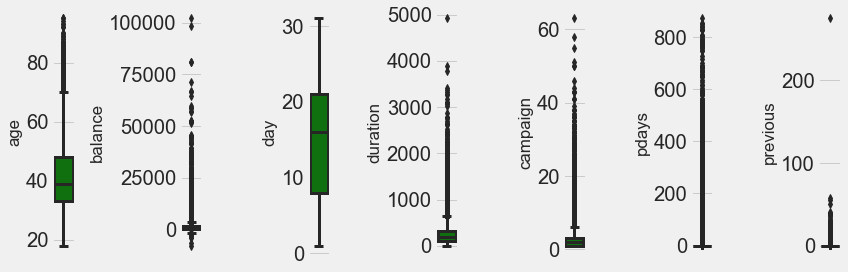

In [17]:
plt.figure(figsize=(12,4))
for i in range(0, len(num)):
    plt.subplot(1, len(num), i+1)
    sns.boxplot(y=df_train[num[i]], color='green', orient='v')
    plt.tight_layout()

#### Individual Distplot

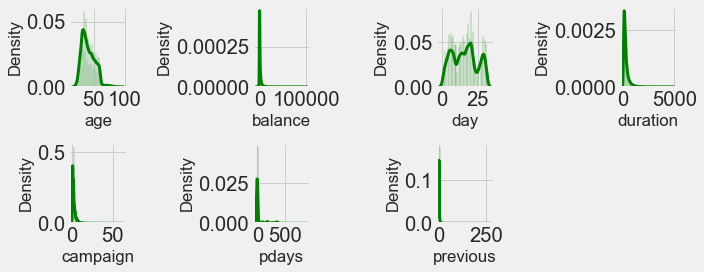

In [18]:
plt.figure(figsize=(10,4))
for i in range(0, len(num)):
    plt.subplot(2, 4, i+1)
    sns.distplot(df_train[num[i]], color='green')
    plt.tight_layout()

#### Individual Violin Plot

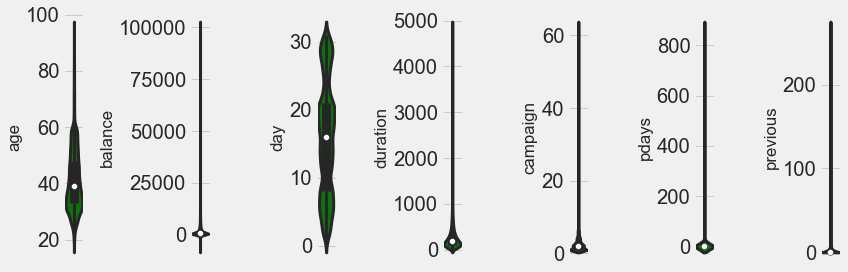

In [19]:
for i in range(0, len(num)):
    plt.subplot(1, len(num), i+1)
    sns.violinplot(y=df_train[num[i]], color='green', orient='v')
    plt.tight_layout()

### Non-Numerical

In [20]:
df_train_cat = df_train[cat]
data_cat_unique = df_train_cat.nunique().reset_index()
data_cat_unique.columns = ['feature', 'unique value']
data_cat_unique = data_cat_unique.sort_values('unique value', ascending=False)
data_cat_unique

,feature,unique value
0,job,12
7,month,12
2,education,4
8,poutcome,4
1,marital,3
6,contact,3
3,default,2
4,housing,2
5,loan,2
9,y,2


#### Job

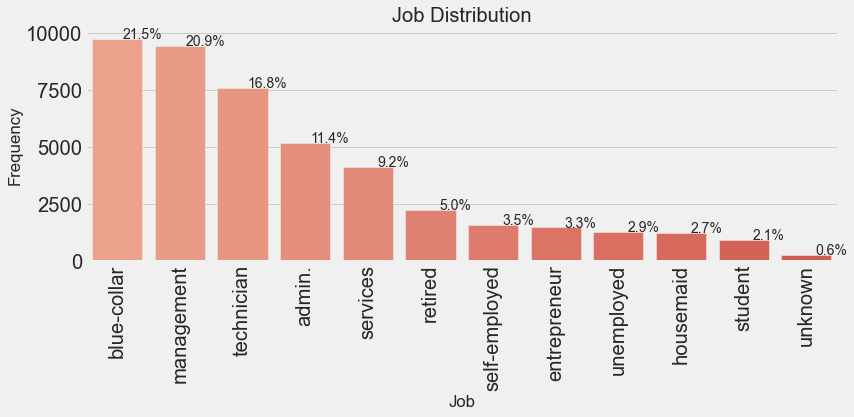

In [21]:
job = sns.countplot(x='job', data=df_train_cat, order = df_train_cat['job'].value_counts().iloc[:30].index,
                palette=sns.color_palette("Reds_d", n_colors=30, desat=1))
total = float(len(df_train))
for p in job.patches:
    percentage = '{:.1f}%'.format(100 * p.get_height()/total)
    x = p.get_x() + p.get_width()
    y = p.get_height()
    job.annotate(percentage, (x, y),ha='center')
plt.title('Job Distribution')
plt.ylabel('Frequency')
plt.xlabel('Job')
plt.xticks(rotation = 90)
plt.show()

Dari grafik distribusi diatas, dapat kita lihat bahwa mayoritas peserta campaign berprofesi sebagai blue-collar, yaitu mencapai 21,5% dari total peserta, dan terdapat 0,6% yang tidak diketahui dengan pasti latar belakang pekerjaannya. 

#### Month

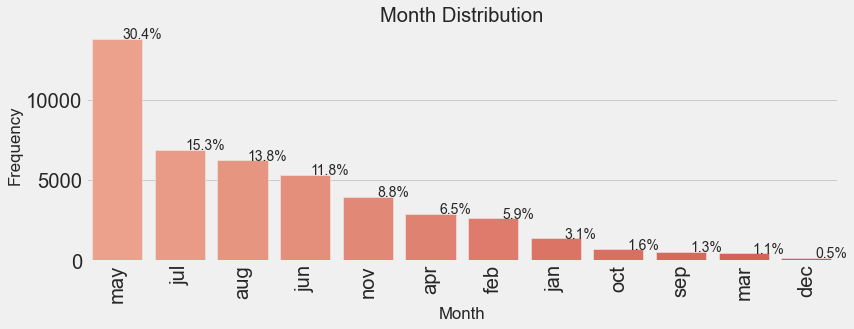

In [22]:
month = sns.countplot(x='month', data=df_train_cat, order = df_train_cat['month'].value_counts().iloc[:30].index,
                palette=sns.color_palette("Reds_d", n_colors=30, desat=1))
total = float(len(df_train))
for p in month.patches:
    percentage = '{:.1f}%'.format(100 * p.get_height()/total)
    x = p.get_x() + p.get_width()
    y = p.get_height()
    month.annotate(percentage, (x, y),ha='center')
plt.title('Month Distribution')
plt.ylabel('Frequency')
plt.xlabel('Month')
plt.xticks(rotation = 90)
plt.show()

Kontak terakhir yang dilakukan ke peserta pada campaign ini paling banyak terjadi di bulan may, yaitu mencapai 30,4% peserta. Hanya 0,5% peserta yang masih dikontak hingga bulan desember.

#### Education

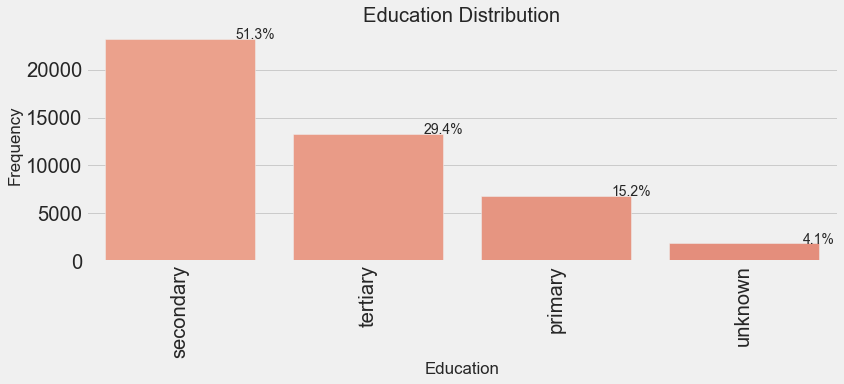

In [23]:
education = sns.countplot(x='education', data=df_train_cat, order = df_train_cat['education'].value_counts().iloc[:30].index,
                palette=sns.color_palette("Reds_d", n_colors=30, desat=1))
total = float(len(df_train))
for p in education.patches:
    percentage = '{:.1f}%'.format(100 * p.get_height()/total)
    x = p.get_x() + p.get_width()
    y = p.get_height()
    education.annotate(percentage, (x, y),ha='center')
plt.title('Education Distribution')
plt.ylabel('Frequency')
plt.xlabel('Education')
plt.xticks(rotation = 90)
plt.show()

Peserta pada camoaign ini mayoritas memiliki berlatar belakang pendidikan secondary, yaitu mencapai 51,3%, dilanjut dengan tertiary yang mencapai 29,4% dan terdapat 4,1% yang tidak diketahui latar belakang pendidikannya

#### Poutcome

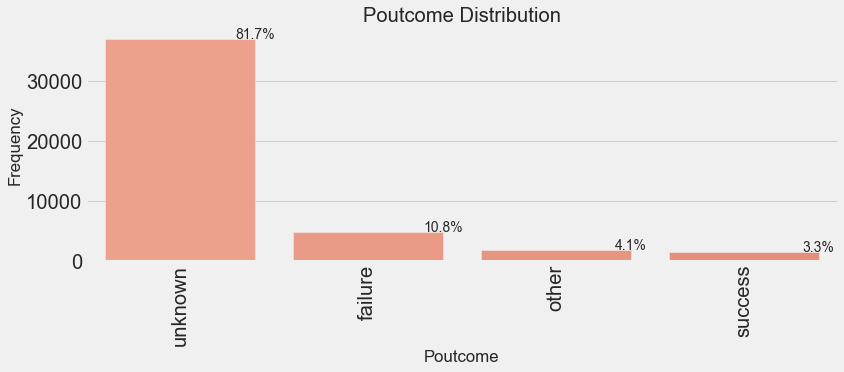

In [24]:
poutcome = sns.countplot(x='poutcome', data=df_train_cat, order = df_train_cat['poutcome'].value_counts().iloc[:30].index,
                palette=sns.color_palette("Reds_d", n_colors=30, desat=1))
total = float(len(df_train))
for p in poutcome.patches:
    percentage = '{:.1f}%'.format(100 * p.get_height()/total)
    x = p.get_x() + p.get_width()
    y = p.get_height()
    poutcome.annotate(percentage, (x, y),ha='center')
plt.title('Poutcome Distribution')
plt.ylabel('Frequency')
plt.xlabel('Poutcome')
plt.xticks(rotation = 90)
plt.show()

Mayoritas dari peserta campaign ini, yaitu 81,7% peserta memiliki record unknown pada campaign sebelumnya. Unknown ini dapat diasumsikan bahwa peserta tersebut kemungkinan tidak diikutsertakan pada campaign sebelumnya.

#### Marital

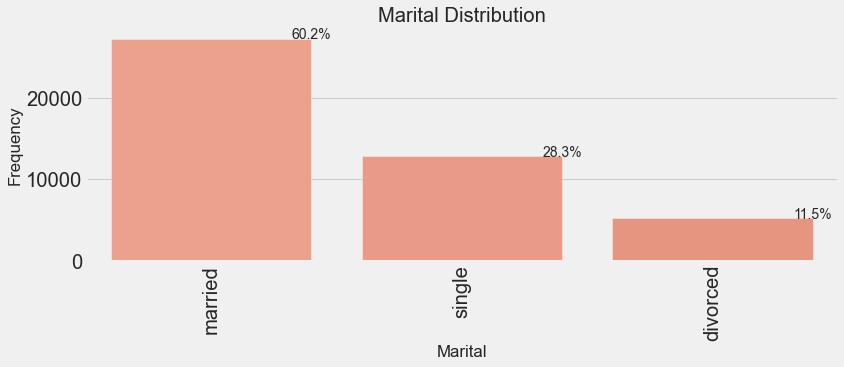

In [25]:
marital = sns.countplot(x='marital', data=df_train_cat, order = df_train_cat['marital'].value_counts().iloc[:30].index,
                palette=sns.color_palette("Reds_d", n_colors=30, desat=1))
total = float(len(df_train))
for p in marital.patches:
    percentage = '{:.1f}%'.format(100 * p.get_height()/total)
    x = p.get_x() + p.get_width()
    y = p.get_height()
    marital.annotate(percentage, (x, y),ha='center')
plt.title('Marital Distribution')
plt.ylabel('Frequency')
plt.xlabel('Marital')
plt.xticks(rotation = 90)
plt.show()

Mayoritas peserta campaign ini, yaitu mencapai 60,2% peserta berstatus married, dan terdapat 11,5% peserta yang tidak diketahui statusnya pernikahannya.

#### Contact

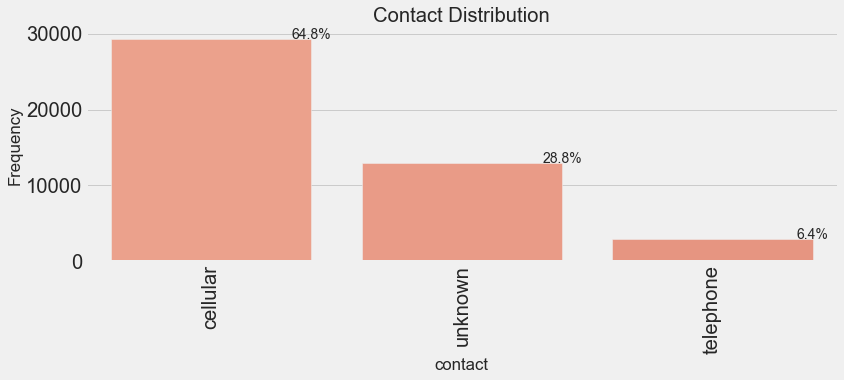

In [26]:
contact = sns.countplot(x='contact', data=df_train_cat, order = df_train_cat['contact'].value_counts().iloc[:30].index,
                palette=sns.color_palette("Reds_d", n_colors=30, desat=1))
total = float(len(df_train))
for p in contact.patches:
    percentage = '{:.1f}%'.format(100 * p.get_height()/total)
    x = p.get_x() + p.get_width()
    y = p.get_height()
    contact.annotate(percentage, (x, y),ha='center')
plt.title('Contact Distribution')
plt.ylabel('Frequency')
plt.xlabel('contact')
plt.xticks(rotation = 90)
plt.show()

Mayoritas peserta campaign ini, yaitu mencapai 64,8% peserta melakukan komunikasi menggunakan cellular, hanya 6,4% peserta yang menggunakan telephone

#### Default

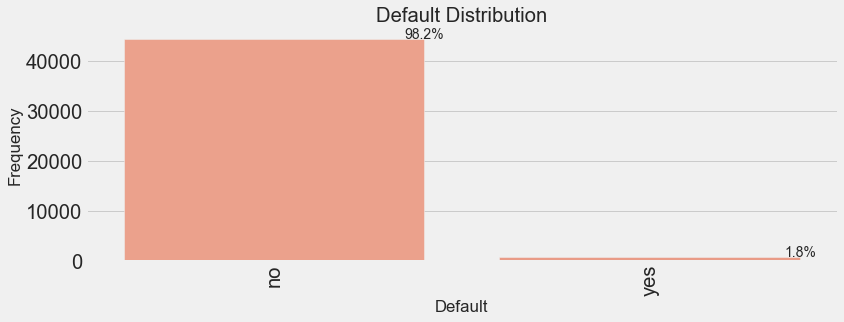

In [27]:
default = sns.countplot(x='default', data=df_train_cat, order = df_train_cat['default'].value_counts().iloc[:30].index,
                palette=sns.color_palette("Reds_d", n_colors=30, desat=1))
total = float(len(df_train))
for p in default.patches:
    percentage = '{:.1f}%'.format(100 * p.get_height()/total)
    x = p.get_x() + p.get_width()
    y = p.get_height()
    default.annotate(percentage, (x, y),ha='center')
plt.title('Default Distribution')
plt.ylabel('Frequency')
plt.xlabel('Default')
plt.xticks(rotation = 90)
plt.show()

Mayoritas peserta campaign ini tidak memiliki credit, yaitu mencapai 98,2% peserta, hanya 1,8% yang memiliki credit

#### Housing

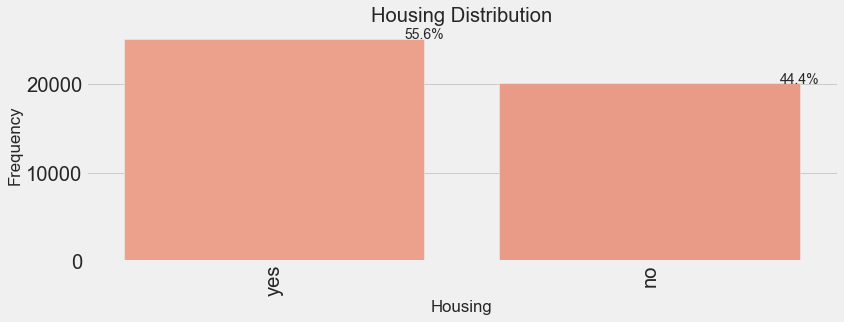

In [28]:
housing = sns.countplot(x='housing', data=df_train_cat, order = df_train_cat['housing'].value_counts().iloc[:30].index,
                palette=sns.color_palette("Reds_d", n_colors=30, desat=1))
total = float(len(df_train))
for p in housing.patches:
    percentage = '{:.1f}%'.format(100 * p.get_height()/total)
    x = p.get_x() + p.get_width()
    y = p.get_height()
    housing.annotate(percentage, (x, y),ha='center')
plt.title('Housing Distribution')
plt.ylabel('Frequency')
plt.xlabel('Housing')
plt.xticks(rotation = 90)
plt.show()

Persentase peserta yang memiliki cicilan rumah dan tidak jumlahnya hampir imbang, yaitu terdapat 55,6% peserta yang memiliki cicilan rumah dan 44,4% peserta yang tidak memiliki cicilan rumah

#### Loan

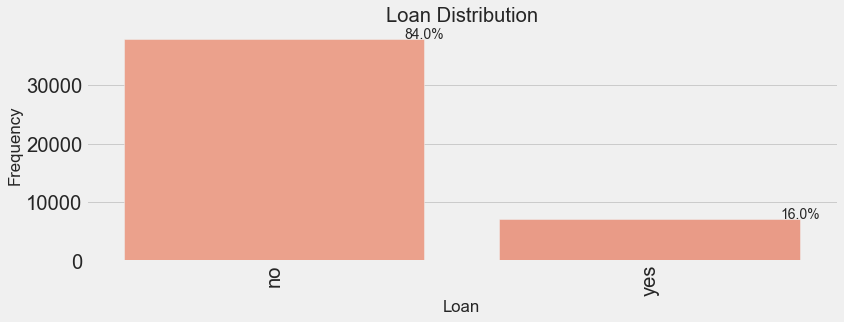

In [29]:
loan = sns.countplot(x='loan', data=df_train_cat, order = df_train_cat['loan'].value_counts().iloc[:30].index,
                palette=sns.color_palette("Reds_d", n_colors=30, desat=1))
total = float(len(df_train))
for p in loan.patches:
    percentage = '{:.1f}%'.format(100 * p.get_height()/total)
    x = p.get_x() + p.get_width()
    y = p.get_height()
    loan.annotate(percentage, (x, y),ha='center')
plt.title('Loan Distribution')
plt.ylabel('Frequency')
plt.xlabel('Loan')
plt.xticks(rotation = 90)
plt.show()

Mayoritas peserta campaign tidak memiliki cicilan pribadi, yaitu mencapai 84%, hanya 16% peserta yang memiliki cicilan pribadi

#### Y

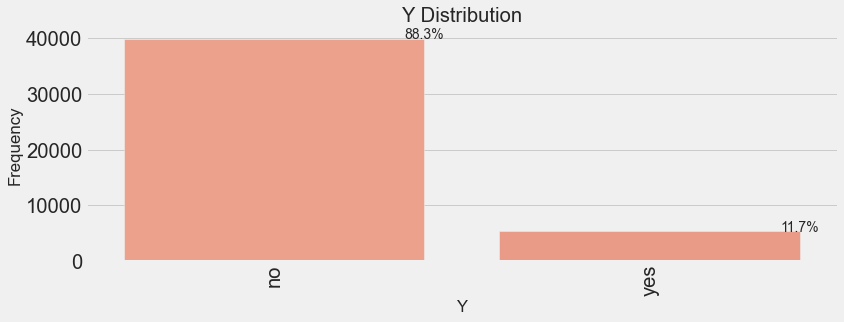

In [30]:
yes = sns.countplot(x='y', data=df_train_cat, order = df_train_cat['y'].value_counts().iloc[:30].index,
                palette=sns.color_palette("Reds_d", n_colors=30, desat=1))
total = float(len(df_train))
for p in yes.patches:
    percentage = '{:.1f}%'.format(100 * p.get_height()/total)
    x = p.get_x() + p.get_width()
    y = p.get_height()
    yes.annotate(percentage, (x, y),ha='center')
plt.title('Y Distribution')
plt.ylabel('Frequency')
plt.xlabel('Y')
plt.xticks(rotation = 90)
plt.show()

Dari campaign yang telah dilakukan selama 1 tahun ini, hanya 11,7% peserta yang akhirnya memilih untuk membuka deposito, sedangkan 88,3% peserta lainnya memilih untuk tidak membukanya.

### Multivariate Analysis

#### Numerical

##### Correlation Heatmap

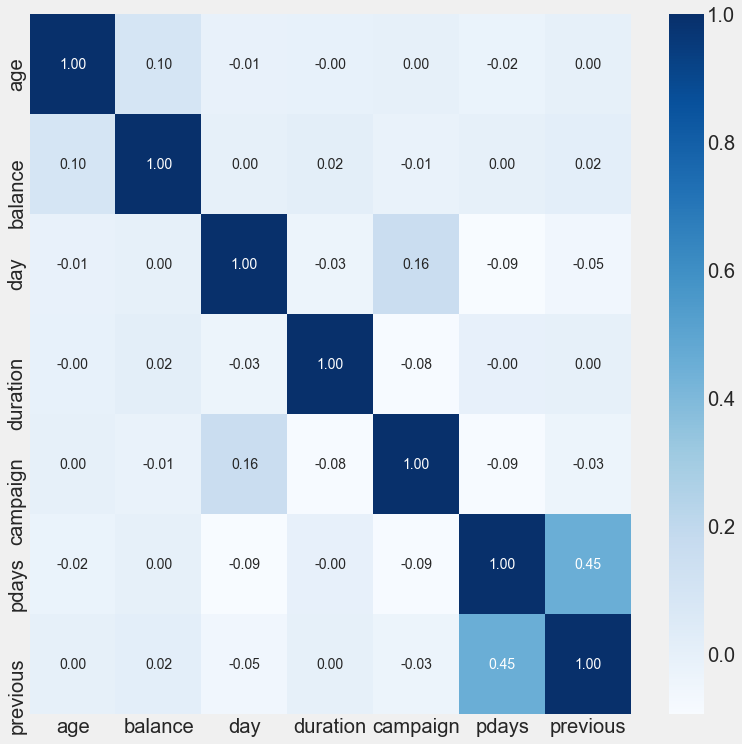

In [31]:
plt.figure(figsize=(12, 12))
sns.heatmap(df_train.corr(), cmap='Blues', annot=True, fmt='.2f');

Terdapat dua feature yang memiliki korelasi yang tinggi, yaitu pdays dan previous. Selain itu, ada juga beberapa feature yang tidak memiliki korelasi sama sekali, seperti :
* age dengan previous, campaign, dan duration
* balance dengan pdays dan day
* duration dengan previous, pdays dan age

Untuk feature-feature lainnya saling memiliki korelasi, baik korelasi yang positif maupun negatif, namun korelasinya rendah

##### Demografi Data Jika Dicompare Dengan Target

In [32]:
age = df_train.groupby(['y'])['age'].agg({'mean','median'}).reset_index()
balance = df_train.groupby(['y'])['balance'].agg({'mean','median'}).reset_index()
duration = df_train.groupby(['y'])['duration'].agg({'mean','median'}).reset_index()
campaign = df_train.groupby(['y'])['campaign'].agg({'mean','median'}).reset_index()
pdays = df_train.groupby(['y'])['pdays'].agg({'mean','median'}).reset_index()
previous = df_train.groupby(['y'])['previous'].agg({'mean','median'}).reset_index()

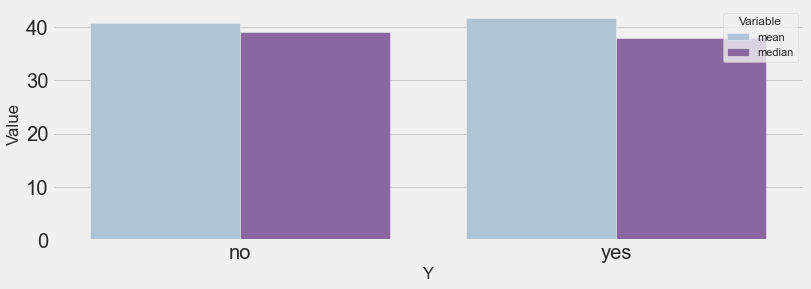

In [33]:
# Compare age vs y
age_vs_target = age.melt(id_vars='y').rename(columns=str.title)
g = sns.barplot(x='Y', y='Value', hue='Variable', data=age_vs_target, palette='BuPu')

Setelah dilakukan compare antara feature age dan target maka didapat bahwa bahwa peserta campaign yang menolak maupun menerima campaign ini relatif memiliki rentang usia yang hampir sama, dari sini kita dapat simpulkan bahwa usia peserta tidak begitu berpengaruh terhadap keberhasilan campaign.

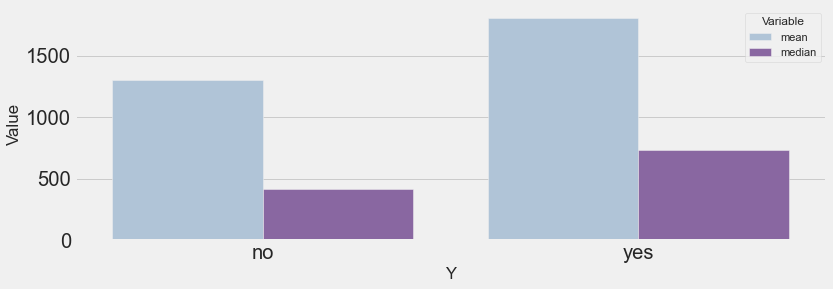

In [34]:
# Compare balance vs y
balance_vs_target = balance.melt(id_vars='y').rename(columns=str.title)
g = sns.barplot(x='Y', y='Value', hue='Variable', data=balance_vs_target, palette='BuPu')

Setelah dilakukan compare antara feature balance dan target maka didapat bahwa bahwa peserta yang menerima campaign cenderung memiliki nilai balance yang lebih tinggi dibanding yang menolak campaign.

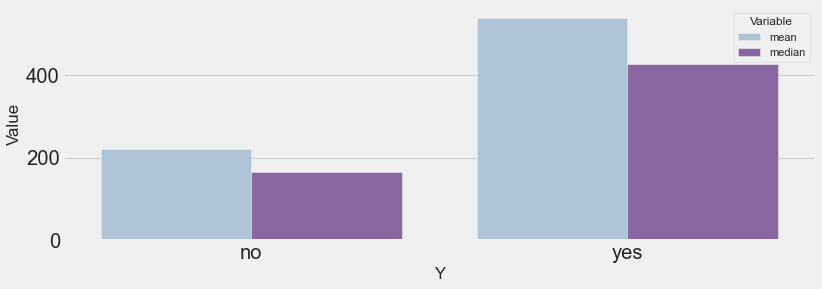

In [35]:
#Compare duration vs y
duration_vs_target = duration.melt(id_vars='y').rename(columns=str.title)
g = sns.barplot(x='Y', y='Value', hue='Variable', data=duration_vs_target, palette='BuPu')

Setelah dilakukan compare antara feature duration dan target maka didapat bahwa bahwa peserta yang menerima campaign cenderung memiliki durasi kontak yang lebih lama dibanding yang menolak campaign.

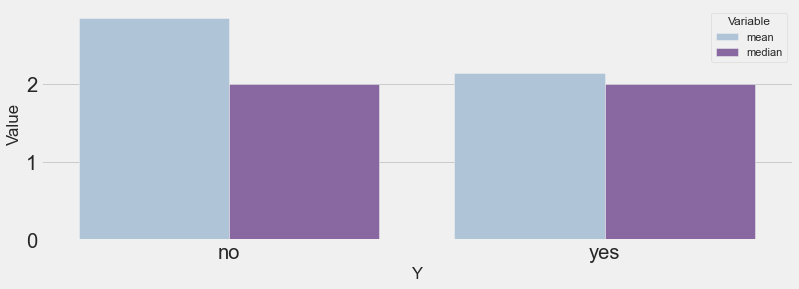

In [36]:
# Compare campaign vs y
campaign_vs_target = campaign.melt(id_vars='y').rename(columns=str.title)
g = sns.barplot(x='Y', y='Value', hue='Variable', data=campaign_vs_target, palette='BuPu')

Setelah dilakukan compare antara feature campaign dan target maka didapat bahwa penilaian performa kontak saat campaign baik kepada peserta yang menolak maupun menerima memiliki median yang sama. 

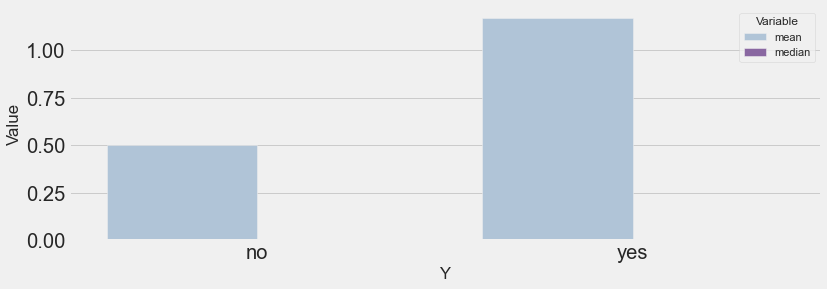

In [37]:
# Compare previous vs y
previous_vs_target = previous.melt(id_vars='y').rename(columns=str.title)
g = sns.barplot(x='Y', y='Value', hue='Variable', data=previous_vs_target, palette='BuPu')

Setelah dilakukan compare antara feature previous dan target maka didapat bahwa peserta yang memiliki performa contact yang lebih tinggi pada campaign sebelumnya dan diikutkan kembali pada campaign ini cenderung menerima campaign (membuat deposito). 

##### Pairplot

<Figure size 1080x1080 with 0 Axes>

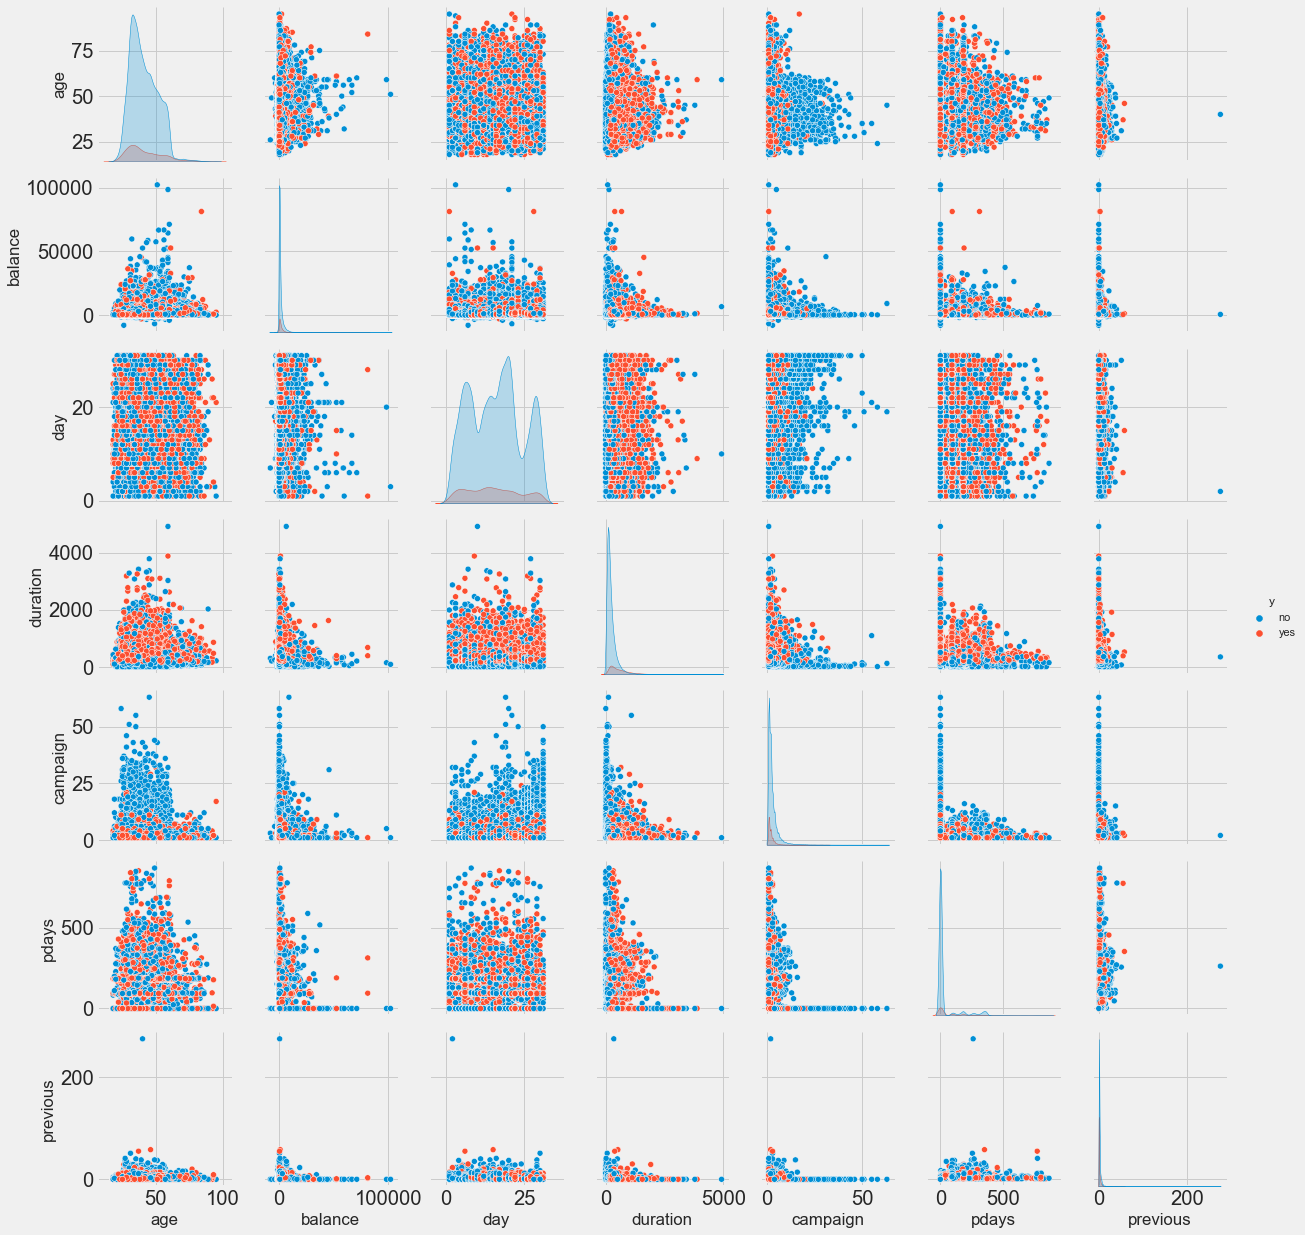

In [38]:
plt.figure(figsize=(15, 15))
sns.pairplot(df_train, diag_kind='kde',hue='y');

### Non Numerical

In [39]:
df_train['ID_Nasabah'] = df_train.index

#### Pada Bulan Apakah Jumlah dan Persentase Terbesar Nasabah Membuka Deposit ?

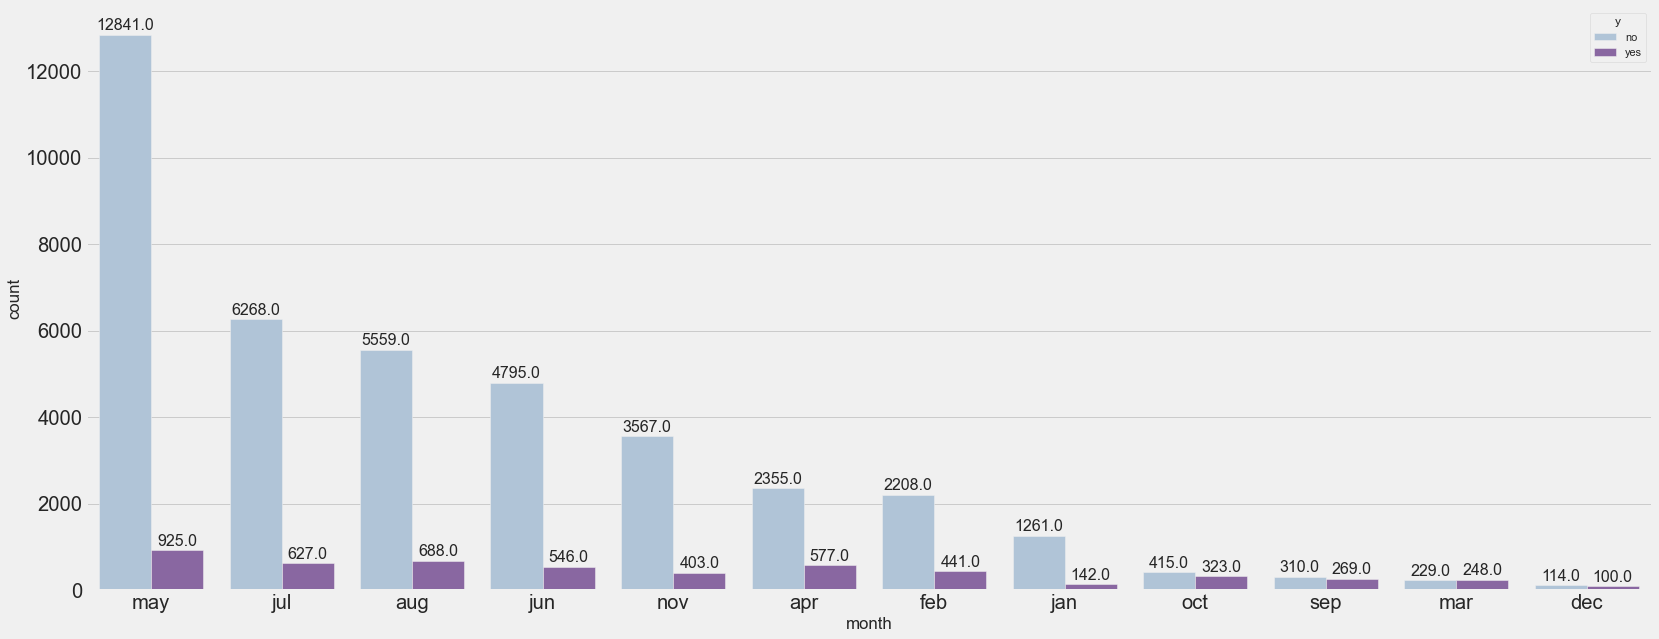

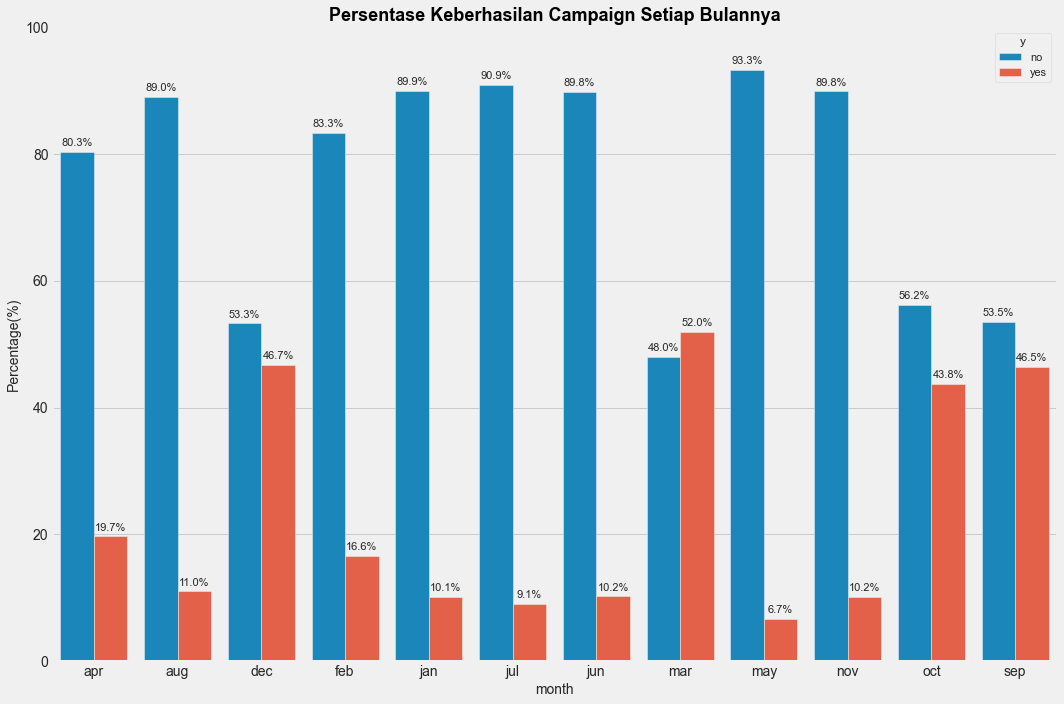

In [40]:
month_groupby1 = df_train.groupby(['month', 'y'])['ID_Nasabah'].nunique().reset_index(name='UniqueCustomer')
month_groupby2 = df_train.groupby(['month'])['ID_Nasabah'].nunique().reset_index(name='AllUniqueCustomer')

month_groupby = month_groupby1.merge(month_groupby2, how = 'inner', on='month')
month_groupby['PercentUniqueCustomer'] = round(month_groupby['UniqueCustomer']*100.0/month_groupby['AllUniqueCustomer'], 2) 

plt.subplots(figsize=(25,10))

month_vs_y = sns.countplot(x='month', data=df_train, order = df_train['month'].value_counts().iloc[:15].index, 
              hue='y', palette='BuPu')

for p in month_vs_y.patches:
    month_vs_y.annotate(format(p.get_height(), '.1f'), 
                   (p.get_x() + p.get_width() / 2., p.get_height()), 
                   ha = 'center', va = 'center', 
                   xytext = (0, 9), 
                       textcoords = 'offset points', size=16)

plt.figure(figsize=(15,10))
month_vs_y_percent = sns.barplot(x='month', y='PercentUniqueCustomer', hue='y', data=month_groupby)

for p in month_vs_y_percent.patches:
    month_vs_y_percent.annotate('{:.1f}%'.format(p.get_height(), '.1f'), 
                   (p.get_x() + p.get_width() / 2., p.get_height()), 
                   ha = 'center', va = 'center', 
                   xytext = (0, 9), 
                       textcoords = 'offset points', size=11)
    
plt.title("Persentase Keberhasilan Campaign Setiap Bulannya",color='black',fontsize=18,fontweight='bold')
plt.ylabel('Percentage(%)', fontsize=14) # y axis label
plt.xlabel('month', fontsize=14) # x axis label
plt.tick_params(axis = 'both', which = 'major', labelsize = 14)
plt.ylim(0,100)

plt.tight_layout()

Dari grafik diatas didapat bahwa jumlah pembukaan deposito paling banyak pada campaign ini terjadi pada bulan may, namun pada bulan tersebut juga banyak sekali nasabah yang menolak campaign ini. Jika kita lihat pada persentase keberhasilan, maka keberhasilan campaign tertinggi terjadi pada bulan maret, pada bulan tersebut jumlah nasabah yang membuka deposit melebihi 50% dari total nasabah yang mengakhiri kontak terkait campaign ini pada bulan tersebut.

#### Nasabah Dengan Latar Belakang Pekerjaan Apakah Yang Kemungkinan Membuka Depositonya Besar ?

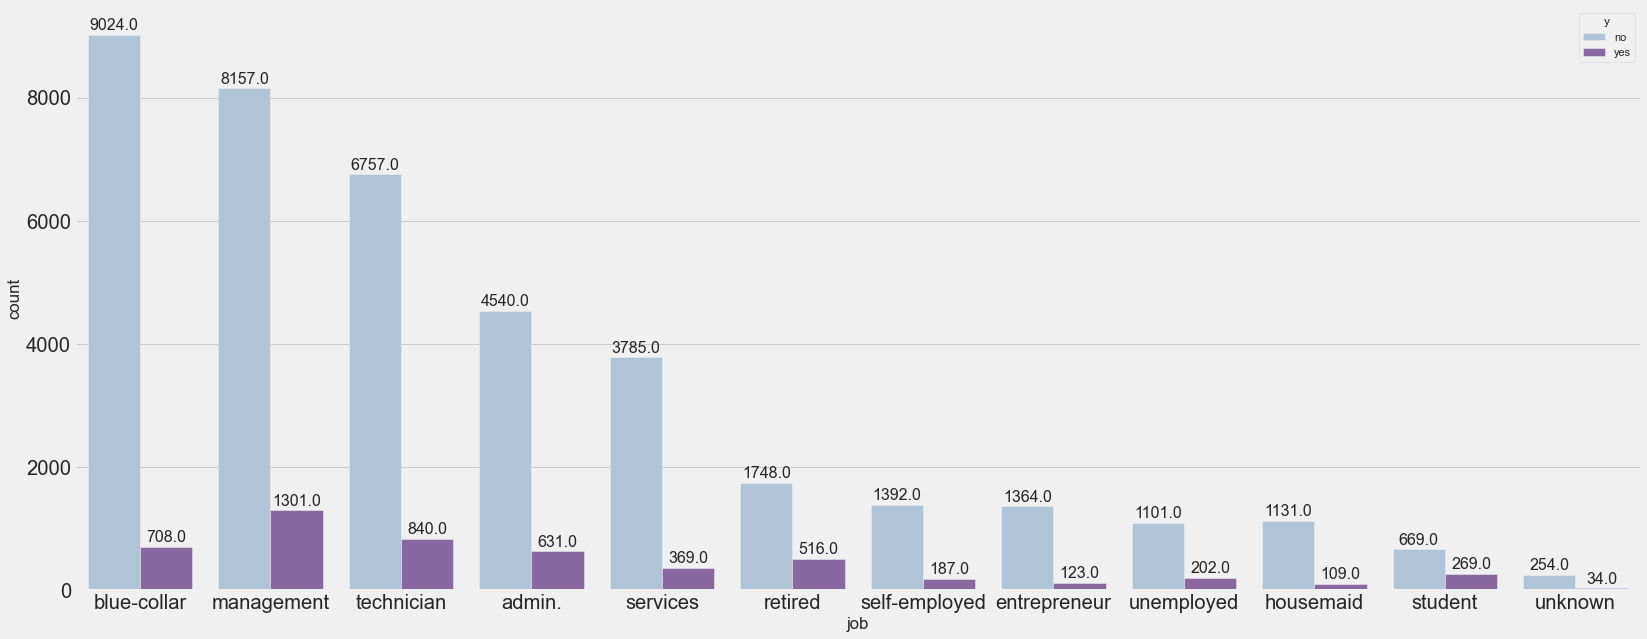

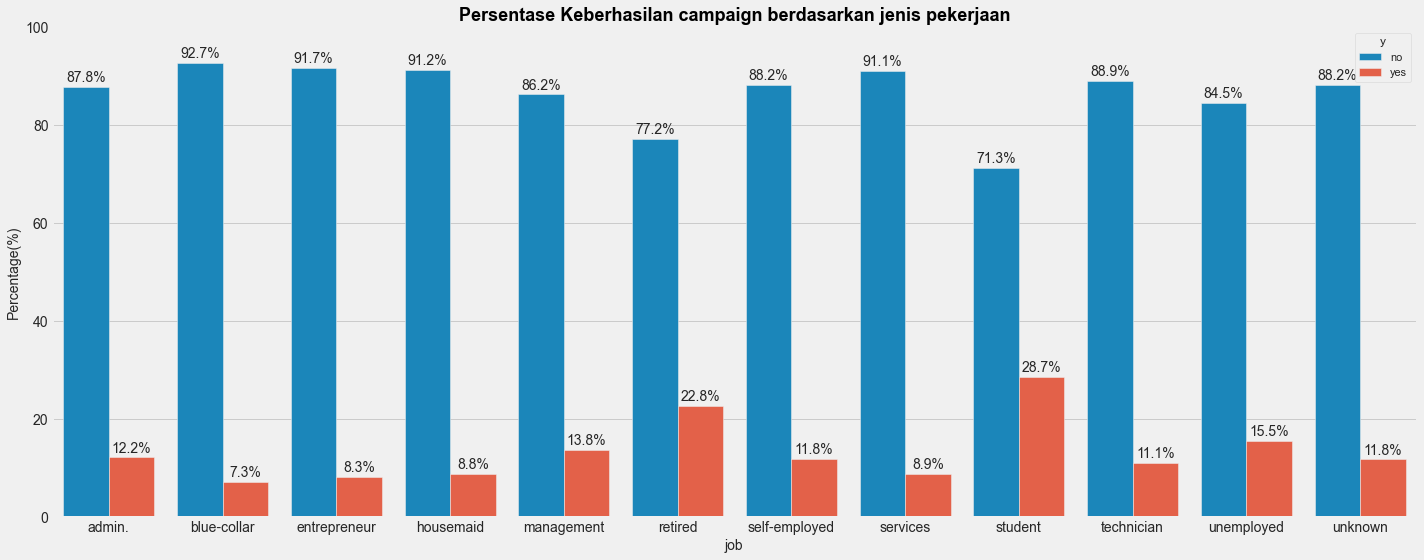

In [41]:
job_groupby1 = df_train.groupby(['job', 'y'])['ID_Nasabah'].nunique().reset_index(name='UniqueCustomer')
job_groupby2 = df_train.groupby(['job'])['ID_Nasabah'].nunique().reset_index(name='AllUniqueCustomer')

job_groupby = job_groupby1.merge(job_groupby2, how = 'inner', on='job')
job_groupby['PercentUniqueCustomer'] = round(job_groupby['UniqueCustomer']*100.0/job_groupby['AllUniqueCustomer'], 2) 

plt.subplots(figsize=(25,10))
job_vs_y = sns.countplot(x='job', data=df_train, order = df_train['job'].value_counts().iloc[:15].index,
              hue='y', palette='BuPu')

for p in job_vs_y.patches:
    job_vs_y.annotate(format(p.get_height(), '.1f'), 
                   (p.get_x() + p.get_width() / 2., p.get_height()), 
                   ha = 'center', va = 'center', 
                   xytext = (0, 9), 
                       textcoords = 'offset points', size=16)

plt.figure(figsize=(20,8))
job_vs_y_percent = sns.barplot(x='job', y='PercentUniqueCustomer', hue='y', data=job_groupby)

for p in job_vs_y_percent.patches:
    job_vs_y_percent.annotate('{:.1f}%'.format(p.get_height(), '.1f'), 
                   (p.get_x() + p.get_width() / 2., p.get_height()), 
                   ha = 'center', va = 'center', 
                   xytext = (0, 9), 
                       textcoords = 'offset points', size=14)

plt.title("Persentase Keberhasilan campaign berdasarkan jenis pekerjaan",color='black',fontsize=18,fontweight='bold')
plt.ylabel('Percentage(%)', fontsize=14) # y axis label
plt.xlabel('job', fontsize=14) # x axis label
plt.tick_params(axis = 'both', which = 'major', labelsize = 14)
plt.ylim(0,100)

plt.tight_layout()

Dari grafik diatas didapat bahwa jumlah pembukaan deposito paling banyak pada campaign ini dilakukan oleh nasabah dengan latar belakang pekerjaan sebagai management, namun banyak juga nasabah dengan latar belakang pekerjaan tersebut yang menolak campaign ini. Jika kita lihat pada persentase keberhasilan, maka keberhasilan campaign tertinggi terjadi pada nasabah dengan latar belakang pekerjaan sebagai seorang student.

#### Nasabah Dengan Latar Belakang Status Perkawinan Apakah Yang Kemungkinan Membuka Depositonya Besar ?

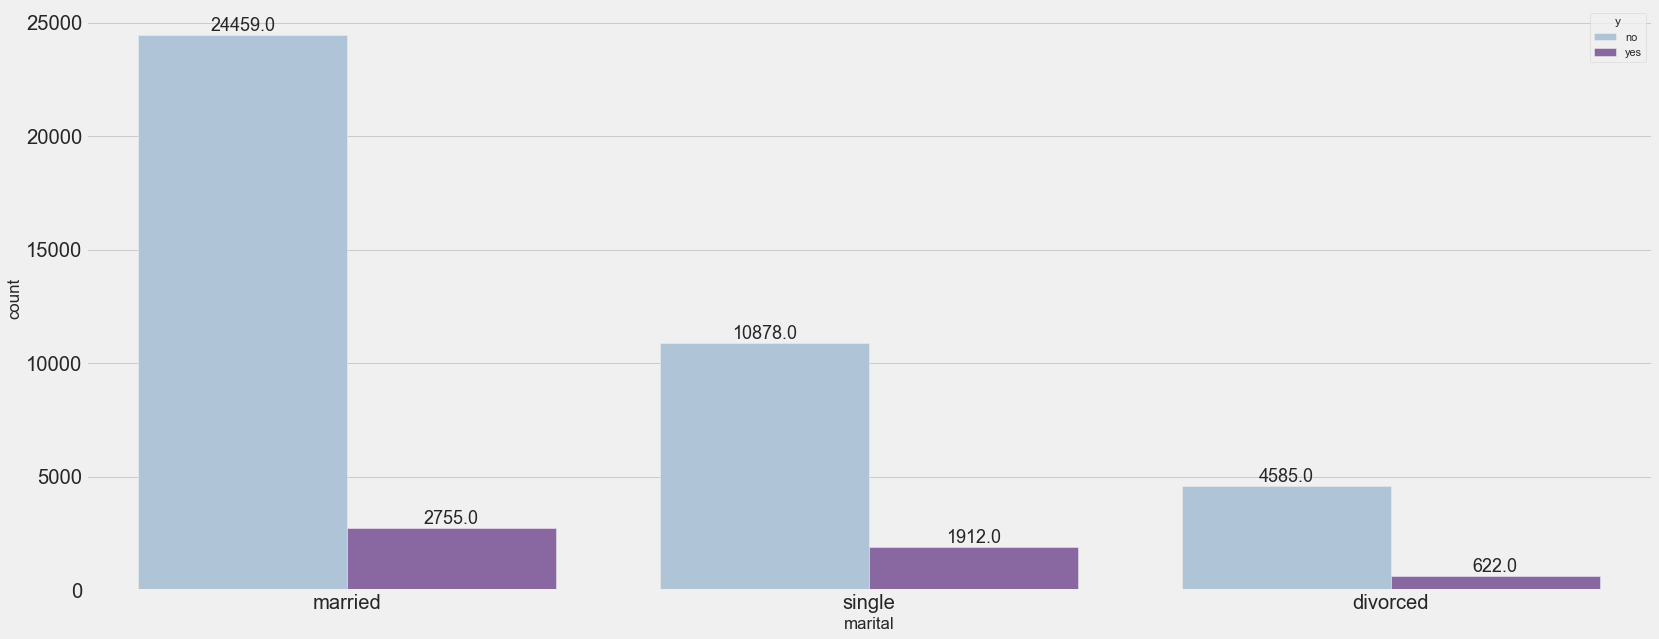

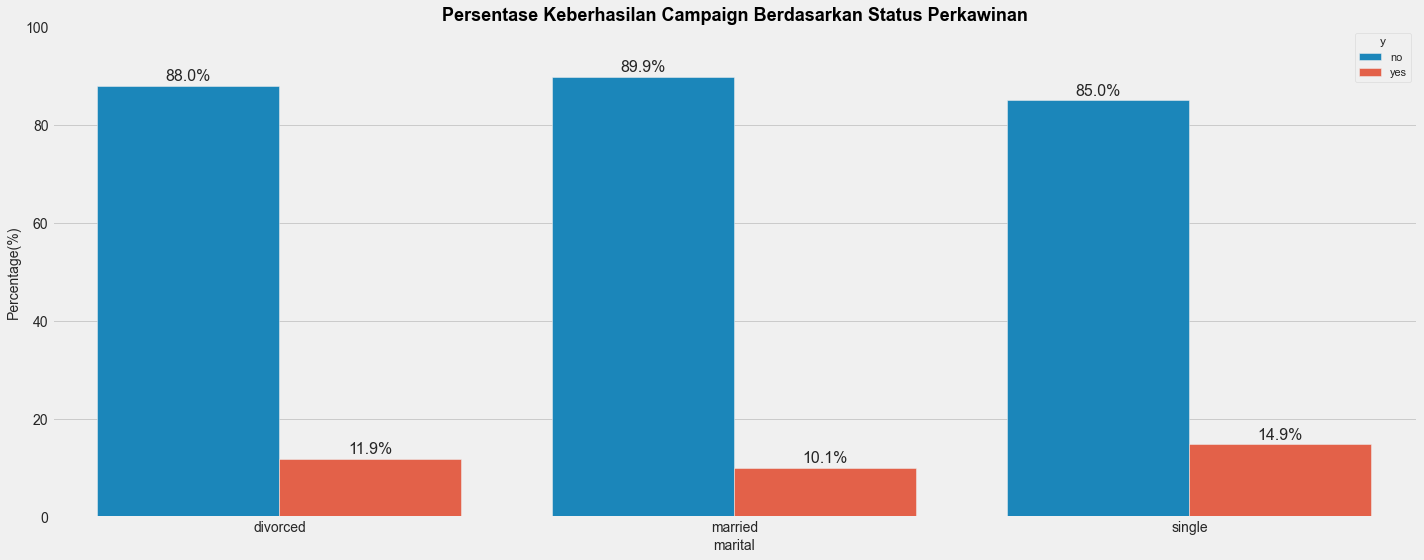

In [42]:
marital_groupby1 = df_train.groupby(['marital', 'y'])['ID_Nasabah'].nunique().reset_index(name='UniqueCustomer')
marital_groupby2 = df_train.groupby(['marital'])['ID_Nasabah'].nunique().reset_index(name='AllUniqueCustomer')

marital_groupby = marital_groupby1.merge(marital_groupby2, how = 'inner', on='marital')
marital_groupby['PercentUniqueCustomer'] = round(marital_groupby['UniqueCustomer']*100.0/marital_groupby['AllUniqueCustomer'], 2) 

plt.subplots(figsize=(25,10))
marital_vs_y = sns.countplot(x='marital', data=df_train, order = df_train['marital'].value_counts().iloc[:15].index,
              hue='y', palette='BuPu')

for p in marital_vs_y.patches:
    marital_vs_y.annotate(format(p.get_height(), '.1f'), 
                   (p.get_x() + p.get_width() / 2., p.get_height()), 
                   ha = 'center', va = 'center', 
                   xytext = (0, 9), 
                       textcoords = 'offset points', size=18)

plt.figure(figsize=(20,8))
marital_vs_y_percent = sns.barplot(x='marital', y='PercentUniqueCustomer', hue='y', data=marital_groupby)

for p in marital_vs_y_percent.patches:
    marital_vs_y_percent.annotate('{:.1f}%'.format(p.get_height(), '.1f'), 
                   (p.get_x() + p.get_width() / 2., p.get_height()), 
                   ha = 'center', va = 'center', 
                   xytext = (0, 9), 
                       textcoords = 'offset points', size=16)

plt.title("Persentase Keberhasilan Campaign Berdasarkan Status Perkawinan",color='black',fontsize=18,fontweight='bold')
plt.ylabel('Percentage(%)', fontsize=14)
plt.xlabel('marital', fontsize=14)
plt.tick_params(axis = 'both', which = 'major', labelsize = 14)
plt.ylim(0,100)

plt.tight_layout()

Dari grafik diatas didapat bahwa jumlah pembukaan deposito paling banyak pada campaign ini dilakukan oleh nasabah yang berstatus married, namun banyak juga nasabah dengan latar belakang status tersebut yang menolak campaign ini. Jika kita lihat pada persentase keberhasilan, maka keberhasilan campaign tertinggi terjadi pada nasabah dengan status single.

#### Nasabah Dengan Latar Belakang Pendidikan Apakah Yang Kemungkinan Membuka Depositonya Besar ?

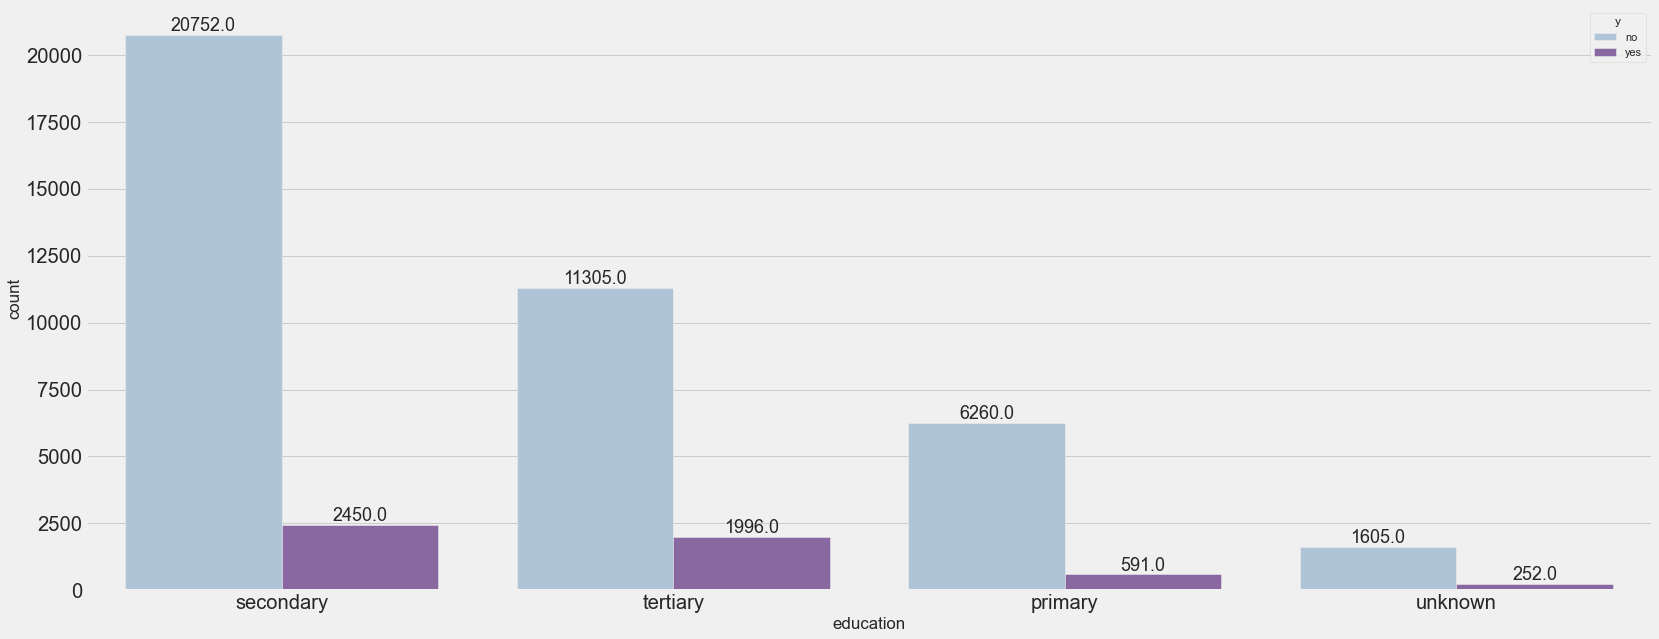

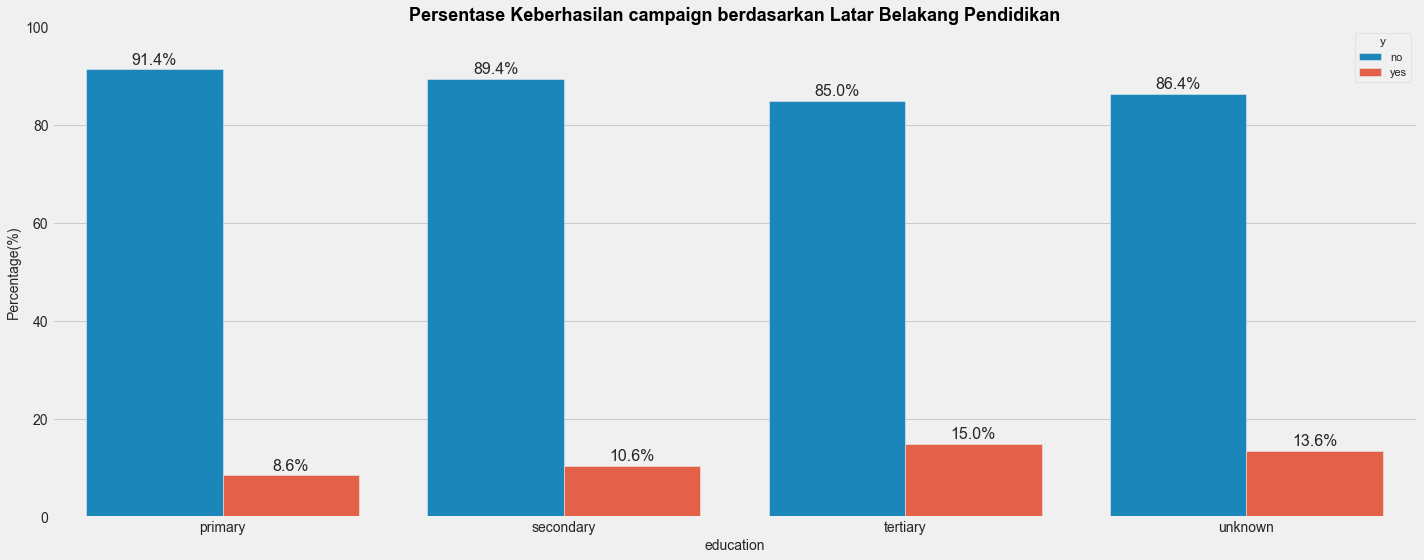

In [43]:
education_groupby1 = df_train.groupby(['education', 'y'])['ID_Nasabah'].nunique().reset_index(name='UniqueCustomer')
education_groupby2 = df_train.groupby(['education'])['ID_Nasabah'].nunique().reset_index(name='AllUniqueCustomer')

education_groupby = education_groupby1.merge(education_groupby2, how = 'inner', on='education')
education_groupby['PercentUniqueCustomer'] = round(education_groupby['UniqueCustomer']*100.0/education_groupby['AllUniqueCustomer'], 2) 

plt.subplots(figsize=(25,10))
education_vs_y = sns.countplot(x='education', data=df_train, order = df_train['education'].value_counts().iloc[:15].index,
              hue='y', palette='BuPu')

for p in education_vs_y.patches:
    education_vs_y.annotate(format(p.get_height(), '.1f'), 
                   (p.get_x() + p.get_width() / 2., p.get_height()), 
                   ha = 'center', va = 'center', 
                   xytext = (0, 9), 
                       textcoords = 'offset points', size=18)

plt.figure(figsize=(20,8))
education_vs_y_percent = sns.barplot(x='education', y='PercentUniqueCustomer', hue='y', data=education_groupby)

for p in education_vs_y_percent.patches:
    education_vs_y_percent.annotate('{:.1f}%'.format(p.get_height(), '.1f'), 
                   (p.get_x() + p.get_width() / 2., p.get_height()), 
                   ha = 'center', va = 'center', 
                   xytext = (0, 9), 
                       textcoords = 'offset points', size=16)

plt.title("Persentase Keberhasilan campaign berdasarkan Latar Belakang Pendidikan",color='black',fontsize=18,fontweight='bold')
plt.ylabel('Percentage(%)', fontsize=14) # y axis label
plt.xlabel('education', fontsize=14) # x axis label
plt.tick_params(axis = 'both', which = 'major', labelsize = 14)
plt.ylim(0,100)

plt.tight_layout()

Dari grafik diatas didapat bahwa jumlah pembukaan deposito paling banyak pada campaign ini dilakukan oleh nasabah yang berlatar belakang pendidikan secondary, namun banyak juga nasabah dengan latar belakang pendidikan tersebut yang menolak campaign ini. Jika kita lihat pada persentase keberhasilan, maka keberhasilan campaign tertinggi terjadi pada nasabah dengan latar belakang pendidikan tertiary.

#### Nasabah Yang Memiliki Record Seperti Apakah Yang Kemungkinan Membuka Depositonya Besar ?

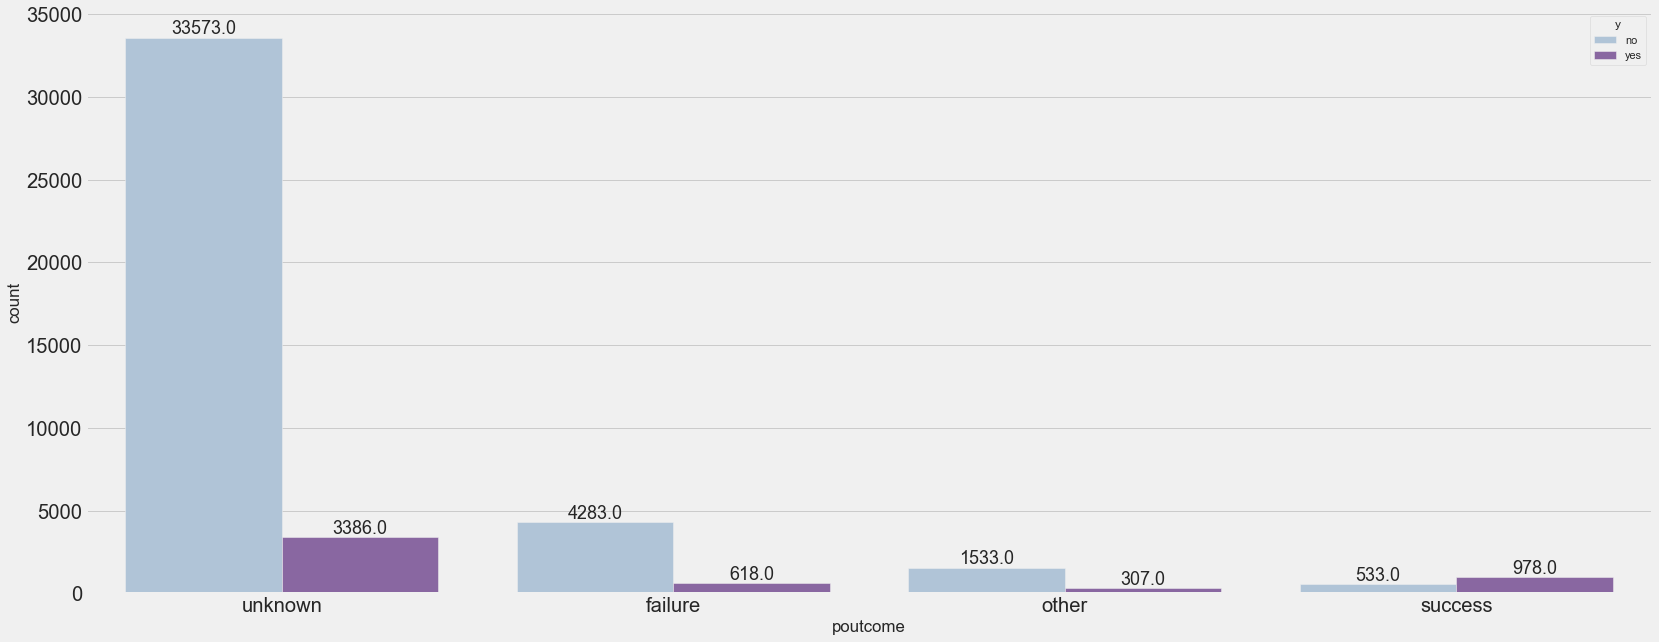

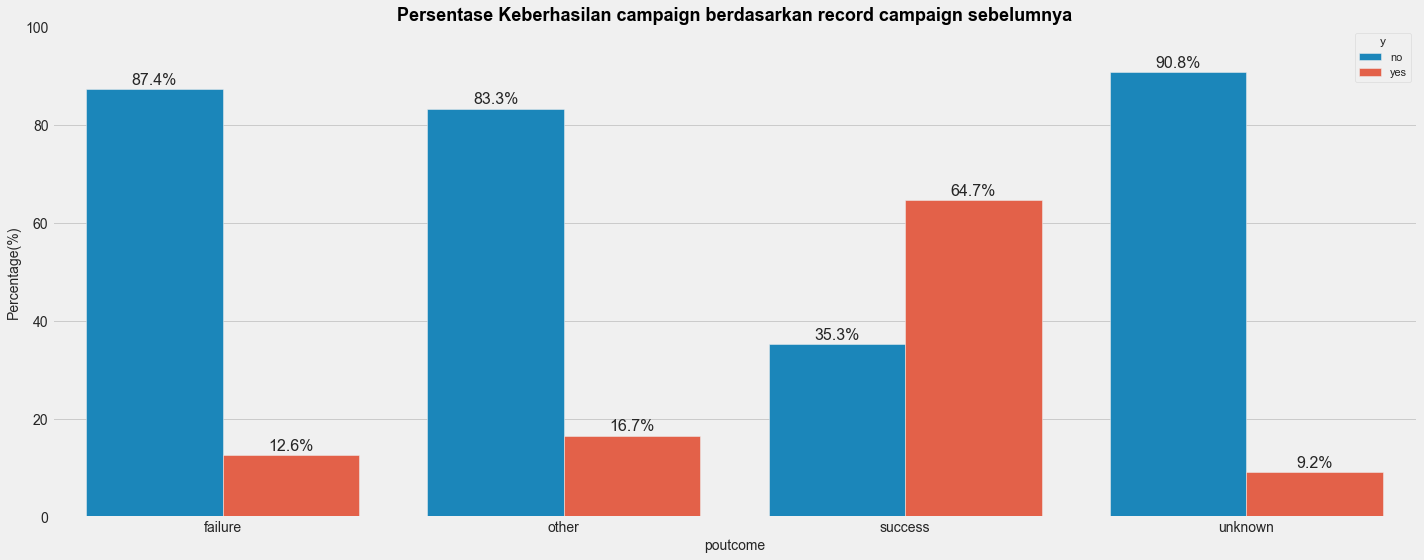

In [44]:
poutcome_groupby1 = df_train.groupby(['poutcome', 'y'])['ID_Nasabah'].nunique().reset_index(name='UniqueCustomer')
poutcome_groupby2 = df_train.groupby(['poutcome'])['ID_Nasabah'].nunique().reset_index(name='AllUniqueCustomer')

poutcome_groupby = poutcome_groupby1.merge(poutcome_groupby2, how = 'inner', on='poutcome')
poutcome_groupby['PercentUniqueCustomer'] = round(poutcome_groupby['UniqueCustomer']*100.0/poutcome_groupby['AllUniqueCustomer'], 2) 

plt.subplots(figsize=(25,10))
poutcome_vs_y = sns.countplot(x='poutcome', data=df_train, order = df_train['poutcome'].value_counts().iloc[:15].index,
              hue='y', palette='BuPu')

for p in poutcome_vs_y.patches:
    poutcome_vs_y.annotate(format(p.get_height(), '.1f'), 
                   (p.get_x() + p.get_width() / 2., p.get_height()), 
                   ha = 'center', va = 'center', 
                   xytext = (0, 9), 
                       textcoords = 'offset points', size=18)

plt.figure(figsize=(20,8))
poutcome_vs_y_percent = sns.barplot(x='poutcome', y='PercentUniqueCustomer', hue='y', data=poutcome_groupby)

for p in poutcome_vs_y_percent.patches:
    poutcome_vs_y_percent.annotate('{:.1f}%'.format(p.get_height(), '.1f'), 
                   (p.get_x() + p.get_width() / 2., p.get_height()), 
                   ha = 'center', va = 'center', 
                   xytext = (0, 9), 
                       textcoords = 'offset points', size=16)

plt.title("Persentase Keberhasilan campaign berdasarkan record campaign sebelumnya",color='black',fontsize=18,fontweight='bold')
plt.ylabel('Percentage(%)', fontsize=14)
plt.xlabel('poutcome', fontsize=14)
plt.tick_params(axis = 'both', which = 'major', labelsize = 14)
plt.ylim(0,100)

plt.tight_layout()

Dari grafik diatas didapat bahwa jumlah pembukaan deposito paling banyak pada campaign ini dilakukan oleh nasabah yang record campaign unknown (tidak disetakan dalam campaign sebelumnya), namun banyak juga nasabah dengan record campaign tersebut yang menolak campaign ini. Jika kita lihat pada persentase keberhasilan, maka keberhasilan campaign tertinggi terjadi pada nasabah dengan record success pada campaign sebelumnya.

#### Apakah Nasabah Yang Tidak Memiliki Credit Cenderung Mau Membuka Deposito ?

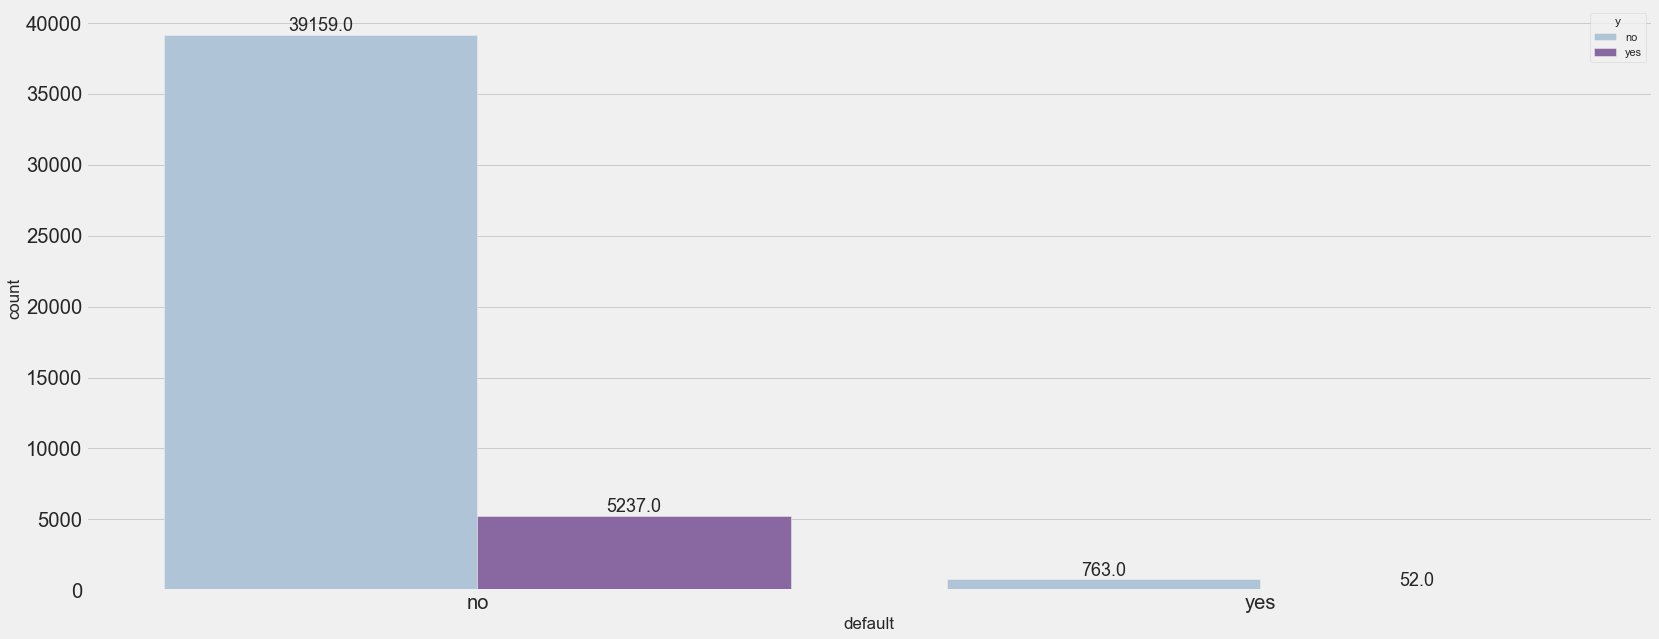

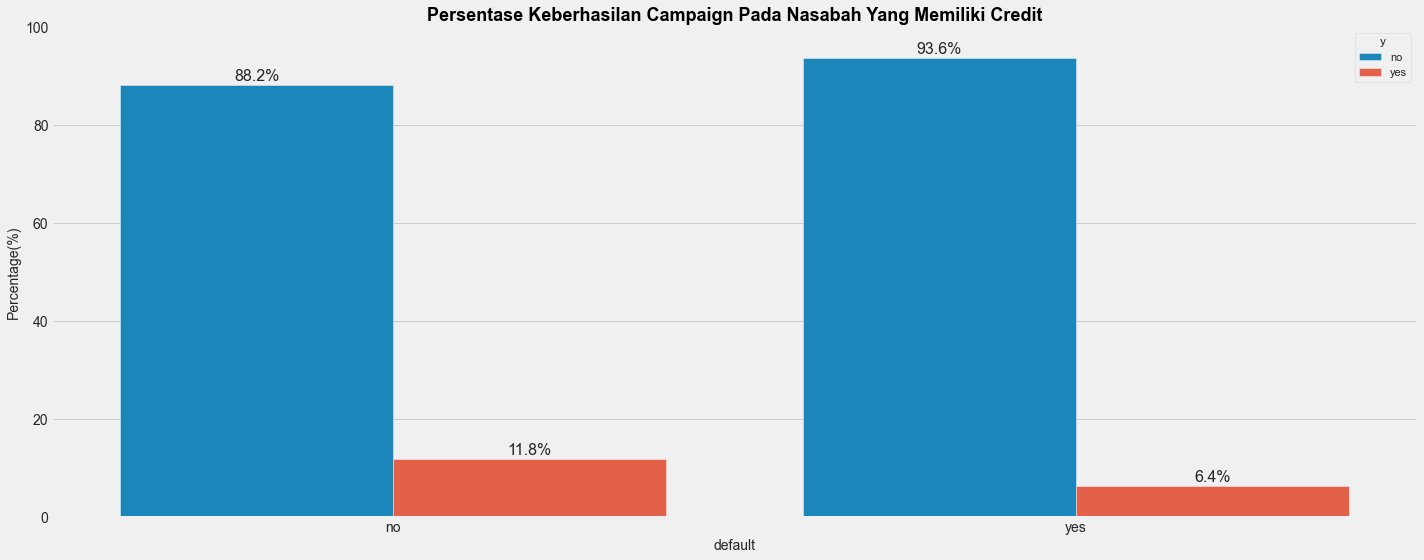

In [45]:
default_groupby1 = df_train.groupby(['default', 'y'])['ID_Nasabah'].nunique().reset_index(name='UniqueCustomer')
default_groupby2 = df_train.groupby(['default'])['ID_Nasabah'].nunique().reset_index(name='AllUniqueCustomer')

default_groupby = default_groupby1.merge(default_groupby2, how = 'inner', on='default')
default_groupby['PercentUniqueCustomer'] = round(default_groupby['UniqueCustomer']*100.0/default_groupby['AllUniqueCustomer'], 2) 

plt.subplots(figsize=(25,10))
default_vs_y = sns.countplot(x='default', data=df_train, order = df_train['default'].value_counts().iloc[:15].index,
              hue='y', palette='BuPu')

for p in default_vs_y.patches:
    default_vs_y.annotate(format(p.get_height(), '.1f'), 
                   (p.get_x() + p.get_width() / 2., p.get_height()), 
                   ha = 'center', va = 'center', 
                   xytext = (0, 9), 
                       textcoords = 'offset points', size=18)

plt.figure(figsize=(20,8))
default_vs_y_percent = sns.barplot(x='default', y='PercentUniqueCustomer', hue='y', data=default_groupby)

for p in default_vs_y_percent.patches:
    default_vs_y_percent.annotate('{:.1f}%'.format(p.get_height(), '.1f'), 
                   (p.get_x() + p.get_width() / 2., p.get_height()), 
                   ha = 'center', va = 'center', 
                   xytext = (0, 9), 
                       textcoords = 'offset points', size=16)

plt.title("Persentase Keberhasilan Campaign Pada Nasabah Yang Memiliki Credit",color='black',fontsize=18,fontweight='bold')
plt.ylabel('Percentage(%)', fontsize=14) # y axis label
plt.xlabel('default', fontsize=14) # x axis label
plt.tick_params(axis = 'both', which = 'major', labelsize = 14)
plt.ylim(0,100)

plt.tight_layout()

Dari grafik diatas didapat bahwa nasabah yang tidak memiliki credit cenderung mau membuka deposito

#### Apakah Nasabah Yang Tidak Memiliki Cicilan Hutang Rumah Cenderung Mau Membuka Deposito ?

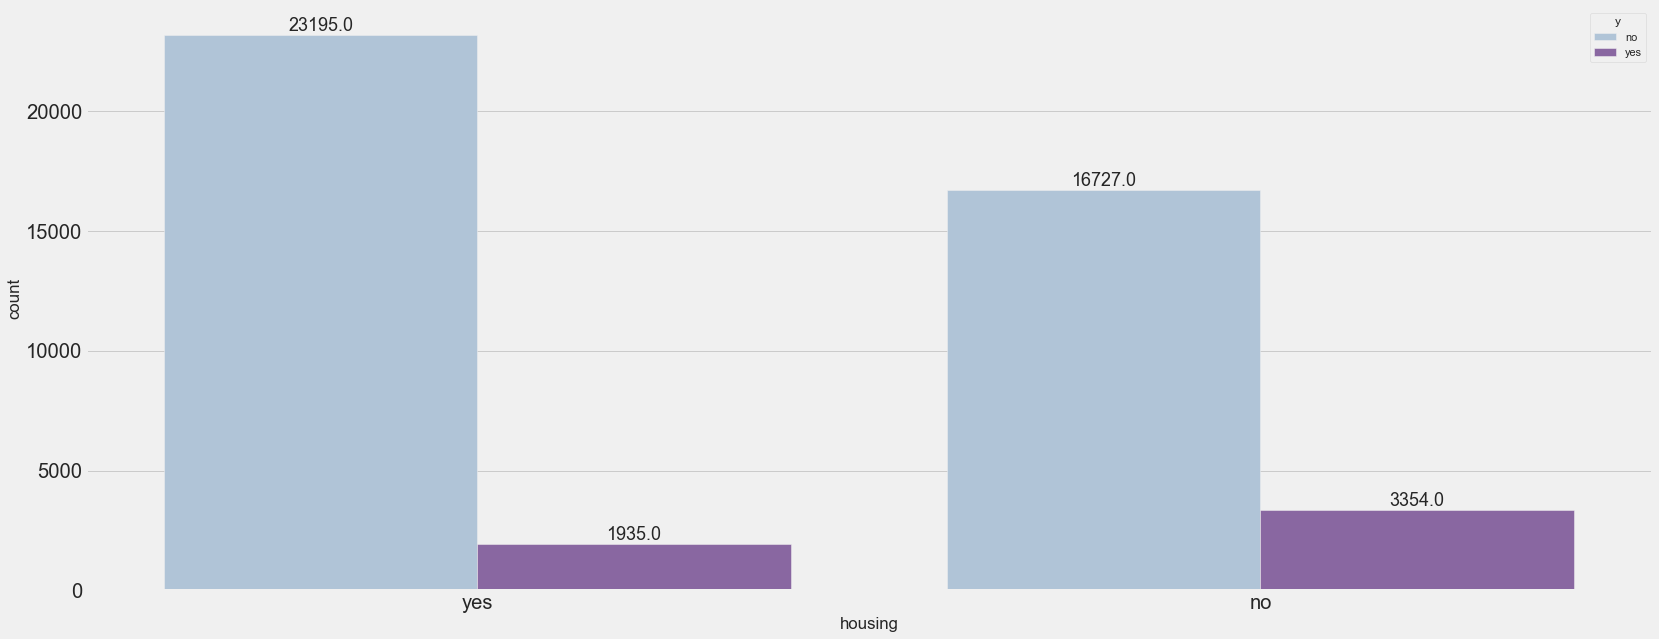

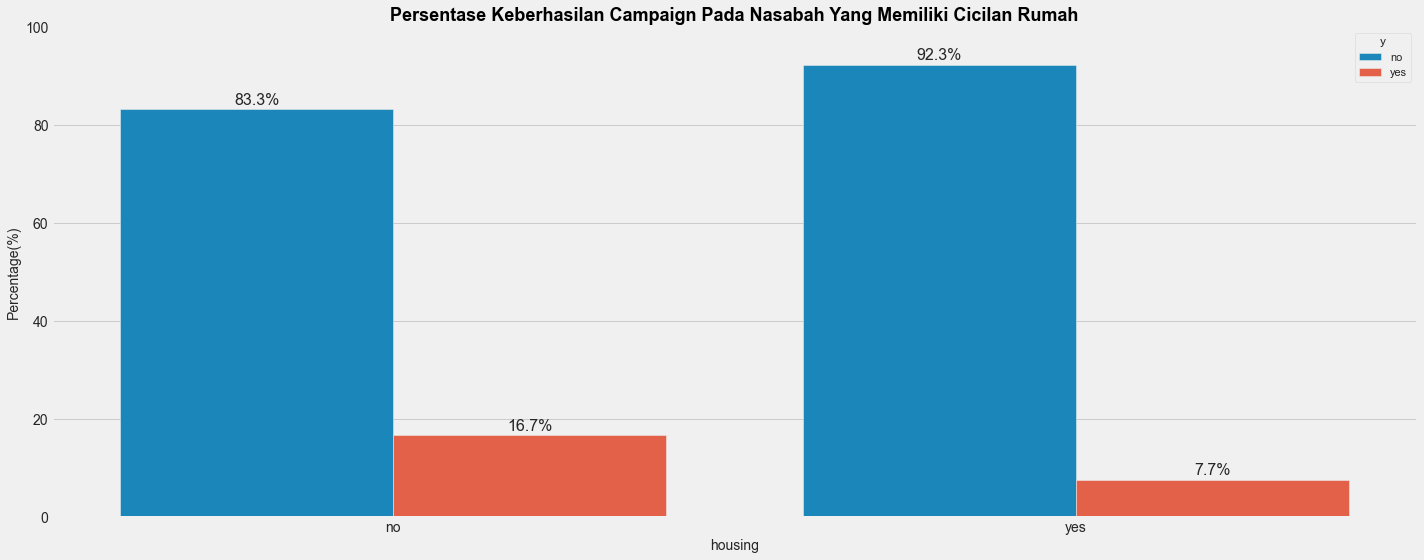

In [46]:
housing_groupby1 = df_train.groupby(['housing', 'y'])['ID_Nasabah'].nunique().reset_index(name='UniqueCustomer')
housing_groupby2 = df_train.groupby(['housing'])['ID_Nasabah'].nunique().reset_index(name='AllUniqueCustomer')

housing_groupby = housing_groupby1.merge(housing_groupby2, how = 'inner', on='housing')
housing_groupby['PercentUniqueCustomer'] = round(housing_groupby['UniqueCustomer']*100.0/housing_groupby['AllUniqueCustomer'], 2) 

plt.subplots(figsize=(25,10))
housing_vs_y = sns.countplot(x='housing', data=df_train, order = df_train['housing'].value_counts().iloc[:15].index,
              hue='y', palette='BuPu')

for p in housing_vs_y.patches:
    housing_vs_y.annotate(format(p.get_height(), '.1f'), 
                   (p.get_x() + p.get_width() / 2., p.get_height()), 
                   ha = 'center', va = 'center', 
                   xytext = (0, 9), 
                       textcoords = 'offset points', size=18)

plt.figure(figsize=(20,8))
housing_vs_y_percent = sns.barplot(x='housing', y='PercentUniqueCustomer', hue='y', data=housing_groupby)

for p in housing_vs_y_percent.patches:
    housing_vs_y_percent.annotate('{:.1f}%'.format(p.get_height(), '.1f'), 
                   (p.get_x() + p.get_width() / 2., p.get_height()), 
                   ha = 'center', va = 'center', 
                   xytext = (0, 9), 
                       textcoords = 'offset points', size=16)

plt.title("Persentase Keberhasilan Campaign Pada Nasabah Yang Memiliki Cicilan Rumah",color='black',fontsize=18,fontweight='bold')
plt.ylabel('Percentage(%)', fontsize=14)
plt.xlabel('housing', fontsize=14)
plt.tick_params(axis = 'both', which = 'major', labelsize = 14)
plt.ylim(0,100)

plt.tight_layout()


Dari grafik diatas didapat bahwa nasabah yang tidak memiliki cicilan rumah cenderung mau membuka deposito

#### Apakah Nasabah Yang Tidak Memiliki Cicilan Hutang Pribadi Cenderung Mau Membuka Deposito ?

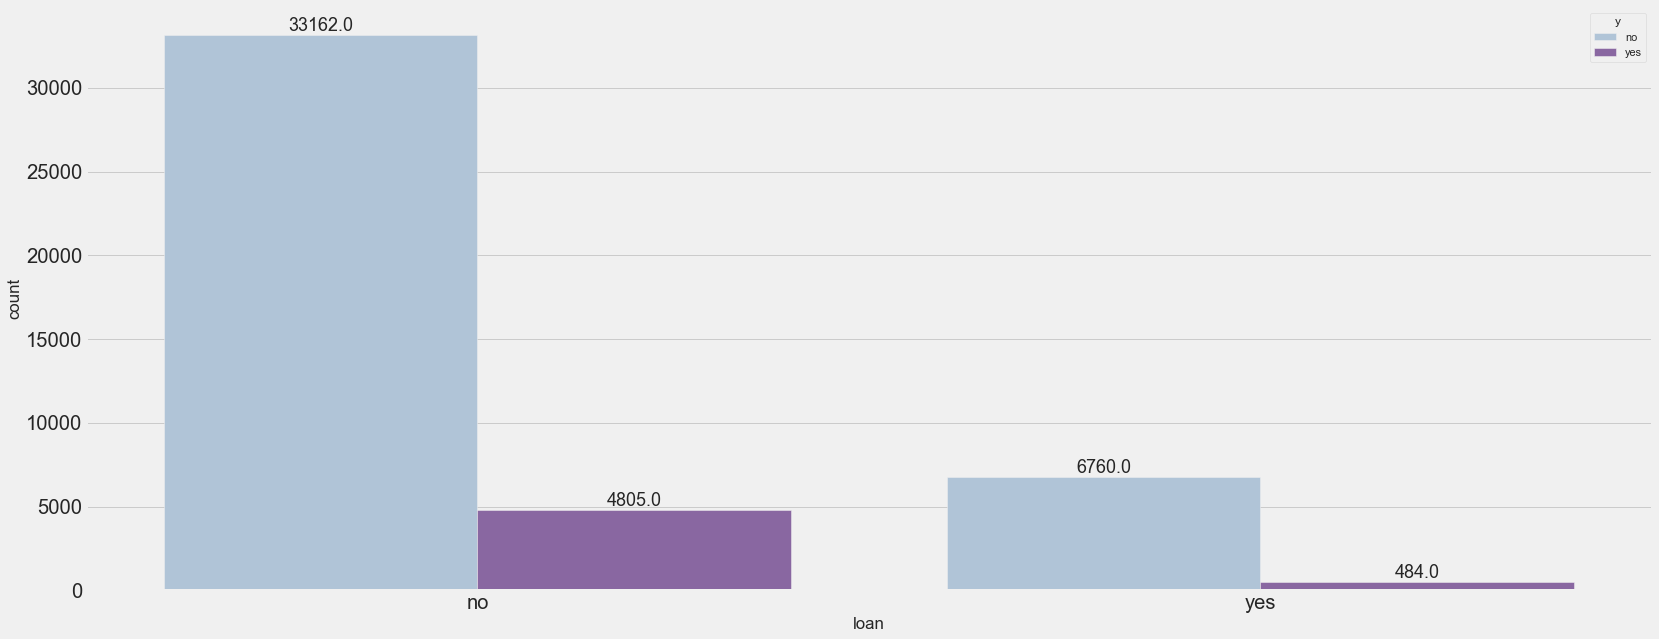

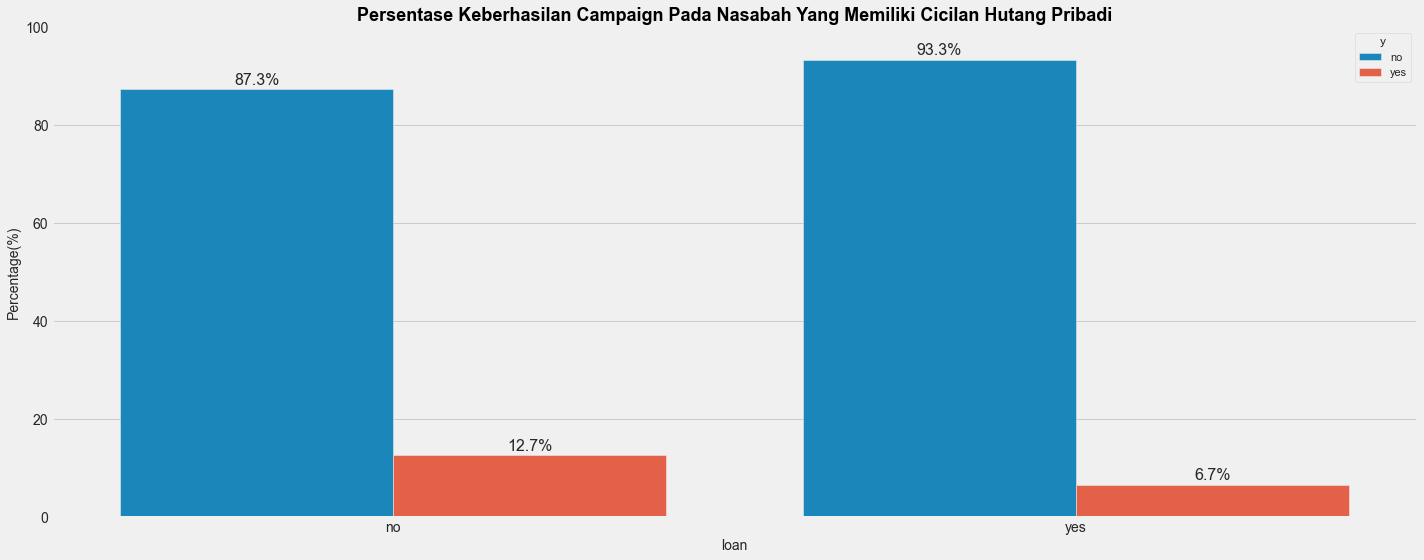

In [47]:
loan_groupby1 = df_train.groupby(['loan', 'y'])['ID_Nasabah'].nunique().reset_index(name='UniqueCustomer')
loan_groupby2 = df_train.groupby(['loan'])['ID_Nasabah'].nunique().reset_index(name='AllUniqueCustomer')

loan_groupby = loan_groupby1.merge(loan_groupby2, how = 'inner', on='loan')
loan_groupby['PercentUniqueCustomer'] = round(loan_groupby['UniqueCustomer']*100.0/loan_groupby['AllUniqueCustomer'], 2) 

plt.subplots(figsize=(25,10))
loan_vs_y = sns.countplot(x='loan', data=df_train, order = df_train['loan'].value_counts().iloc[:15].index,
              hue='y', palette='BuPu')

for p in loan_vs_y.patches:
    loan_vs_y.annotate(format(p.get_height(), '.1f'), 
                   (p.get_x() + p.get_width() / 2., p.get_height()), 
                   ha = 'center', va = 'center', 
                   xytext = (0, 9), 
                       textcoords = 'offset points', size=18)

plt.figure(figsize=(20,8))
loan_vs_y_percent = sns.barplot(x='loan', y='PercentUniqueCustomer', hue='y', data=loan_groupby)

for p in loan_vs_y_percent.patches:
    loan_vs_y_percent.annotate('{:.1f}%'.format(p.get_height(), '.1f'), 
                   (p.get_x() + p.get_width() / 2., p.get_height()), 
                   ha = 'center', va = 'center', 
                   xytext = (0, 9), 
                       textcoords = 'offset points', size=16)

plt.title("Persentase Keberhasilan Campaign Pada Nasabah Yang Memiliki Cicilan Hutang Pribadi",color='black',fontsize=18,fontweight='bold')
plt.ylabel('Percentage(%)', fontsize=14)
plt.xlabel('loan', fontsize=14)
plt.tick_params(axis = 'both', which = 'major', labelsize = 14)
plt.ylim(0,100)

plt.tight_layout()

Dari grafik diatas didapat bahwa nasabah yang tidak memiliki cicilan pribadi cenderung mau membuka deposito

Jika kita lihat pada tiga grafik diatas, didapat bahwa Nasabah yang tidak memiliki credit atau hutang, cenderung mau membuka deposito dibanding dengan Nasabah yang memiliki credit atau hutang

 # DATA PRE-PROCESSING

## Missing Value

### Train

In [48]:
df_train.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y,ID_Nasabah
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no,0
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no,1
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no,2
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no,3
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no,4


In [49]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 18 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   age         45211 non-null  int64 
 1   job         45211 non-null  object
 2   marital     45211 non-null  object
 3   education   45211 non-null  object
 4   default     45211 non-null  object
 5   balance     45211 non-null  int64 
 6   housing     45211 non-null  object
 7   loan        45211 non-null  object
 8   contact     45211 non-null  object
 9   day         45211 non-null  int64 
 10  month       45211 non-null  object
 11  duration    45211 non-null  int64 
 12  campaign    45211 non-null  int64 
 13  pdays       45211 non-null  int64 
 14  previous    45211 non-null  int64 
 15  poutcome    45211 non-null  object
 16  y           45211 non-null  object
 17  ID_Nasabah  45211 non-null  int64 
dtypes: int64(8), object(10)
memory usage: 6.2+ MB


In [50]:
missing_value = df_train.isnull().sum().reset_index()
missing_value.columns = ['feature','missing_value']
missing_value['percentage'] = round((missing_value['missing_value']/len(df_train))*100,2)
missing_value = missing_value.sort_values('percentage', ascending=False).reset_index(drop=True)
missing_value

,feature,missing_value,percentage
0,age,0,0.0
1,job,0,0.0
2,y,0,0.0
3,poutcome,0,0.0
4,previous,0,0.0
5,pdays,0,0.0
6,campaign,0,0.0
7,duration,0,0.0
8,month,0,0.0
9,day,0,0.0


## Duplikat Values

### Train

In [51]:
df_train.duplicated().sum()

0

## Normalization / Standarization

### Train

In [52]:
df_train['day'] = MinMaxScaler().fit_transform(df_train['day'].values.reshape(len(df_train), 1))
df_train['age'] = StandardScaler().fit_transform(df_train['age'].values.reshape(len(df_train), 1))
df_train['balance'] = StandardScaler().fit_transform(df_train['balance'].values.reshape(len(df_train), 1))
df_train['duration'] = StandardScaler().fit_transform(df_train['duration'].values.reshape(len(df_train), 1))
df_train['campaign'] = StandardScaler().fit_transform(df_train['campaign'].values.reshape(len(df_train), 1))
df_train['pdays'] = StandardScaler().fit_transform(df_train['campaign'].values.reshape(len(df_train), 1))
df_train['previous'] = StandardScaler().fit_transform(df_train['previous'].values.reshape(len(df_train), 1))

In [53]:
df_train.sample(10)

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y,ID_Nasabah
1225,-1.312428,student,single,secondary,no,-0.420816,yes,no,unknown,0.233333,may,-0.078296,-0.569351,-0.569351,-0.251940,unknown,no,1225
34432,-0.559037,technician,single,tertiary,no,-0.390271,yes,no,cellular,0.133333,may,-0.594750,-0.569351,-0.569351,-0.251940,unknown,no,34432
19434,0.476877,blue-collar,married,primary,no,-0.447419,no,no,cellular,0.166667,aug,-0.311283,0.399020,0.399020,-0.251940,unknown,no,19434
12937,1.041921,blue-collar,divorced,secondary,no,-0.284187,no,yes,cellular,0.200000,jul,0.073146,-0.246560,-0.246560,-0.251940,unknown,no,12937
27953,-1.218254,technician,single,tertiary,no,-0.320315,yes,no,cellular,0.900000,jan,0.764341,-0.569351,-0.569351,-0.251940,unknown,no,27953
39780,-1.406602,management,single,secondary,no,0.410784,no,no,cellular,0.000000,jun,0.263419,-0.569351,-0.569351,-0.251940,unknown,yes,39780
11647,-0.370689,entrepreneur,married,tertiary,no,0.434432,no,no,unknown,0.633333,jun,-0.276335,-0.246560,-0.246560,-0.251940,unknown,no,11647
3884,-1.124080,self-employed,single,secondary,no,-0.358085,yes,no,unknown,0.500000,may,-0.524854,0.076230,0.076230,-0.251940,unknown,no,3884
8591,-0.747384,unemployed,single,unknown,no,-0.391585,yes,no,unknown,0.066667,jun,0.267302,-0.569351,-0.569351,-0.251940,unknown,no,8591
42666,0.759399,technician,married,primary,no,0.067897,no,no,cellular,0.433333,jan,0.822588,-0.569351,-0.569351,0.182198,other,no,42666


In [54]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 18 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   age         45211 non-null  float64
 1   job         45211 non-null  object 
 2   marital     45211 non-null  object 
 3   education   45211 non-null  object 
 4   default     45211 non-null  object 
 5   balance     45211 non-null  float64
 6   housing     45211 non-null  object 
 7   loan        45211 non-null  object 
 8   contact     45211 non-null  object 
 9   day         45211 non-null  float64
 10  month       45211 non-null  object 
 11  duration    45211 non-null  float64
 12  campaign    45211 non-null  float64
 13  pdays       45211 non-null  float64
 14  previous    45211 non-null  float64
 15  poutcome    45211 non-null  object 
 16  y           45211 non-null  object 
 17  ID_Nasabah  45211 non-null  int64  
dtypes: float64(7), int64(1), object(10)
memory usage: 6.2+ MB


### Test

In [55]:
df_test['day'] = MinMaxScaler().fit_transform(df_test['day'].values.reshape(len(df_test), 1))
df_test['age'] = StandardScaler().fit_transform(df_test['age'].values.reshape(len(df_test), 1))
df_test['balance'] = StandardScaler().fit_transform(df_test['balance'].values.reshape(len(df_test), 1))
df_test['duration'] = StandardScaler().fit_transform(df_test['duration'].values.reshape(len(df_test), 1))
df_test['campaign'] = StandardScaler().fit_transform(df_test['campaign'].values.reshape(len(df_test), 1))
df_test['pdays'] = StandardScaler().fit_transform(df_test['campaign'].values.reshape(len(df_test), 1))
df_test['previous'] = StandardScaler().fit_transform(df_test['previous'].values.reshape(len(df_test), 1))

In [56]:
df_test.sample(10)

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
2364,-0.678021,blue-collar,married,secondary,no,-0.342158,yes,no,cellular,0.133333,may,-0.973573,1.995962,1.995962,-0.320413,unknown,no
1944,0.645851,blue-collar,married,secondary,no,-0.362096,yes,no,cellular,0.433333,may,-0.923539,1.031165,1.031165,-0.320413,unknown,no
4395,0.740414,blue-collar,married,secondary,no,0.048298,no,no,unknown,0.666667,may,-0.223076,1.031165,1.031165,-0.320413,unknown,no
148,0.456727,admin.,married,secondary,no,-0.413271,yes,no,cellular,0.933333,jan,-0.269260,0.387967,0.387967,0.270124,other,no
4094,-0.961707,technician,single,tertiary,no,-0.150752,no,no,cellular,0.466667,jun,-0.650282,-0.576829,-0.576829,-0.320413,unknown,no
162,-0.016085,admin.,single,secondary,no,-0.557822,no,yes,unknown,0.266667,may,-0.881204,0.066368,0.066368,-0.320413,unknown,no
4172,-0.488896,services,single,secondary,no,-0.220203,no,no,unknown,0.633333,jun,-0.981270,3.282358,3.282358,-0.320413,unknown,no
1798,-0.299771,technician,married,tertiary,no,-0.457799,no,no,cellular,0.700000,jul,-0.534821,0.387967,0.387967,-0.320413,unknown,no
3685,-0.772583,management,single,tertiary,no,-0.495017,yes,no,unknown,0.133333,may,0.385019,-0.576829,-0.576829,-0.320413,unknown,no
3795,-0.205209,services,married,secondary,no,1.431673,yes,no,unknown,0.633333,may,-0.342385,-0.255231,-0.255231,-0.320413,unknown,no


In [57]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4521 entries, 0 to 4520
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   age        4521 non-null   float64
 1   job        4521 non-null   object 
 2   marital    4521 non-null   object 
 3   education  4521 non-null   object 
 4   default    4521 non-null   object 
 5   balance    4521 non-null   float64
 6   housing    4521 non-null   object 
 7   loan       4521 non-null   object 
 8   contact    4521 non-null   object 
 9   day        4521 non-null   float64
 10  month      4521 non-null   object 
 11  duration   4521 non-null   float64
 12  campaign   4521 non-null   float64
 13  pdays      4521 non-null   float64
 14  previous   4521 non-null   float64
 15  poutcome   4521 non-null   object 
 16  y          4521 non-null   object 
dtypes: float64(7), object(10)
memory usage: 600.6+ KB


## Encoding Label

### Train

In [58]:
from sklearn import preprocessing

In [59]:
df_train = pd.get_dummies(df_train, columns = ['job','default','housing','month','loan','contact','poutcome'], drop_first = True)

In [60]:
scale_mapper_stat_train1 = {"unknown":0, "primary":1, "secondary":2, "tertiary":3}
df_train["education"] = df_train["education"].replace(scale_mapper_stat_train1)

In [61]:
scale_mapper_stat_train2 = {"married":0, "divorced":1, "single":2}
df_train["marital"] = df_train["marital"].replace(scale_mapper_stat_train2)

In [62]:
scale_mapper_stat_train3 = {"no":0, "yes":1}
df_train["y"] = df_train["y"].replace(scale_mapper_stat_train3)

In [63]:
df_train = df_train.drop('ID_Nasabah', axis=1)

In [64]:
df_train.sample(20)

,age,marital,education,balance,day,duration,campaign,pdays,previous,y,...,month_may,month_nov,month_oct,month_sep,loan_yes,contact_telephone,contact_unknown,poutcome_other,poutcome_success,poutcome_unknown
27481,-0.935732,2,3,-0.346589,0.666667,-0.668530,-0.246560,-0.246560,-0.251940,0,...,0,1,0,0,0,0,0,0,0,1
32938,-1.312428,2,3,0.479099,0.533333,-0.280218,-0.246560,-0.246560,-0.251940,0,...,0,0,0,0,0,0,0,0,0,1
32675,-0.747384,1,2,-0.357756,0.533333,-0.299633,-0.569351,-0.569351,0.182198,0,...,0,0,0,0,0,0,0,0,0,0
31628,-1.406602,2,3,0.145079,0.166667,-0.396711,-0.246560,-0.246560,-0.251940,0,...,0,0,0,0,0,0,0,0,0,1
35261,-0.747384,0,1,-0.285172,0.200000,-0.385062,-0.569351,-0.569351,0.616335,0,...,1,0,0,0,0,0,0,0,0,0
6561,-1.218254,2,3,1.034813,0.866667,-0.353997,0.076230,0.076230,-0.251940,0,...,1,0,0,0,0,0,1,0,0,1
11562,-0.464863,2,3,0.184163,0.600000,-0.152075,-0.569351,-0.569351,-0.251940,0,...,0,0,0,0,0,0,1,0,0,1
31781,-0.935732,0,2,-0.138361,0.233333,-0.175374,0.399020,0.399020,-0.251940,0,...,0,0,0,0,0,0,0,0,0,1
4349,-1.218254,0,2,-0.373850,0.600000,1.214783,0.721811,0.721811,-0.251940,0,...,1,0,0,0,0,0,1,0,0,1
36621,-0.747384,2,2,-0.434939,0.366667,-0.462724,0.399020,0.399020,0.182198,0,...,1,0,0,0,0,1,0,1,0,0


In [65]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 40 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   age                45211 non-null  float64
 1   marital            45211 non-null  int64  
 2   education          45211 non-null  int64  
 3   balance            45211 non-null  float64
 4   day                45211 non-null  float64
 5   duration           45211 non-null  float64
 6   campaign           45211 non-null  float64
 7   pdays              45211 non-null  float64
 8   previous           45211 non-null  float64
 9   y                  45211 non-null  int64  
 10  job_blue-collar    45211 non-null  uint8  
 11  job_entrepreneur   45211 non-null  uint8  
 12  job_housemaid      45211 non-null  uint8  
 13  job_management     45211 non-null  uint8  
 14  job_retired        45211 non-null  uint8  
 15  job_self-employed  45211 non-null  uint8  
 16  job_services       452

### Test

In [66]:
df_test = pd.get_dummies(df_test, columns = ['job','default','housing','month','loan','contact','poutcome'], drop_first = True)

In [67]:
scale_mapper_stat_test1 = {"unknown":0, "primary":1, "secondary":2, "tertiary":3}
df_test["education"] = df_test["education"].replace(scale_mapper_stat_test1)

In [68]:
scale_mapper_stat_test2 = {"married":0, "divorced":1, "single":2}
df_test["marital"] = df_test["marital"].replace(scale_mapper_stat_test2)

In [69]:
scale_mapper_stat = {"no":0, "yes":1}
df_test["y"] = df_test["y"].replace(scale_mapper_stat)

In [70]:
df_test.sample(10)

,age,marital,education,balance,day,duration,campaign,pdays,previous,y,...,month_may,month_nov,month_oct,month_sep,loan_yes,contact_telephone,contact_unknown,poutcome_other,poutcome_success,poutcome_unknown
4256,-0.678021,0,1,0.500561,0.433333,0.977719,-0.255231,-0.255231,-0.320413,1,...,0,0,0,0,0,0,0,0,0,1
4087,1.496912,0,2,0.237378,0.233333,-0.507880,1.352764,1.352764,-0.320413,0,...,0,0,0,0,0,1,0,0,0,1
2883,0.456727,0,3,-0.091270,0.933333,-0.615643,-0.255231,-0.255231,-0.320413,0,...,0,0,0,0,0,1,0,0,0,1
3523,-0.961707,0,2,-0.472753,0.900000,-0.742650,-0.576829,-0.576829,4.994417,0,...,0,0,0,0,1,0,0,1,0,0
3736,-0.016085,0,3,-0.295968,0.266667,-0.731104,-0.576829,-0.576829,-0.320413,0,...,0,0,0,0,0,0,0,0,0,1
103,1.496912,2,1,0.782354,0.400000,-0.765743,-0.255231,-0.255231,-0.320413,0,...,1,0,0,0,0,1,0,0,0,1
4387,-0.961707,0,2,0.741149,0.666667,-0.046035,-0.576829,-0.576829,2.041734,0,...,0,1,0,0,1,0,0,0,0,0
3371,0.740414,0,3,-0.629267,0.633333,-0.719558,0.066368,0.066368,3.813344,0,...,0,1,0,0,0,0,0,0,0,0
1944,0.645851,0,2,-0.362096,0.433333,-0.923539,1.031165,1.031165,-0.320413,0,...,1,0,0,0,0,0,0,0,0,1
1341,-0.961707,0,2,-0.335512,0.400000,-0.765743,-0.576829,-0.576829,-0.320413,0,...,1,0,0,0,0,0,1,0,0,1


In [71]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4521 entries, 0 to 4520
Data columns (total 40 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   age                4521 non-null   float64
 1   marital            4521 non-null   int64  
 2   education          4521 non-null   int64  
 3   balance            4521 non-null   float64
 4   day                4521 non-null   float64
 5   duration           4521 non-null   float64
 6   campaign           4521 non-null   float64
 7   pdays              4521 non-null   float64
 8   previous           4521 non-null   float64
 9   y                  4521 non-null   int64  
 10  job_blue-collar    4521 non-null   uint8  
 11  job_entrepreneur   4521 non-null   uint8  
 12  job_housemaid      4521 non-null   uint8  
 13  job_management     4521 non-null   uint8  
 14  job_retired        4521 non-null   uint8  
 15  job_self-employed  4521 non-null   uint8  
 16  job_services       4521 

## Class Imbalance

(1.0, 41918.1)

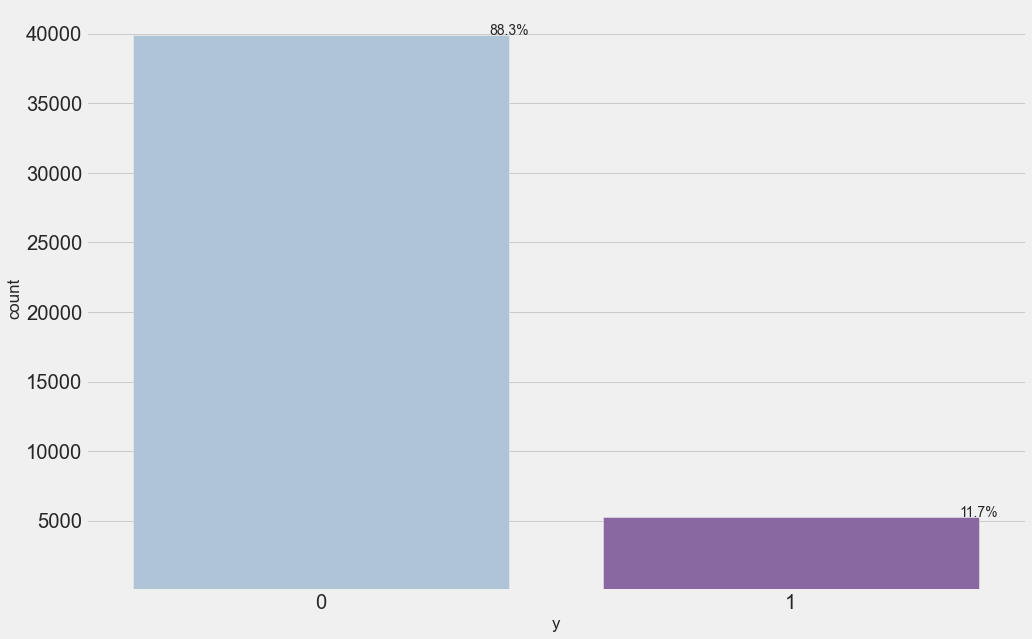

In [72]:
fig, ax = plt.subplots(figsize=(15,10))
yes = sns.countplot('y', data=df_train, palette='BuPu')

total = float(len(df_train))
for p in yes.patches:
    percentage = '{:.1f}%'.format(100 * p.get_height()/total)
    x = p.get_x() + p.get_width()
    y = p.get_height()
    yes.annotate(percentage, (x, y),ha='center')

ax.set_ylim(1)

## Modelling

In [73]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import roc_curve, auc

In [74]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import roc_curve, auc

def eval_classification(model, pred, xtrain, ytrain, xtest, ytest):
    print("Accuracy (Test Set): %.5f" % accuracy_score(ytest, pred))
    print("Precision (Test Set): %.5f" % precision_score(ytest, pred))
    print("Recall (Test Set): %.5f" % recall_score(ytest, pred))
    print("F1-Score (Test Set): %.5f" % f1_score(ytest, pred))
    
    fpr, tpr, thresholds = roc_curve(ytest, pred, pos_label=1) 
    print("AUC: %.5f" % auc(fpr, tpr))

In [75]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
def eval_regression(model, pred, xtrain, ytrain, xtest, ytest):
    print("MAE: %.2f" % mean_absolute_error(ytest, pred)) 
    print("RMSE: %.2f" % mean_squared_error(ytest, pred, squared=False)) 
    print('R2 score: %.2f' % r2_score(ytest, pred)) 

In [76]:
df_train.y.value_counts()

0    39922
1     5289
Name: y, dtype: int64

In [77]:
X_train= df_train[[col for col in df_train.columns if (str(df_train[col].dtype) != 'object') and col not in ['y']]]
y_train= df_train['y'].values
X_test= df_test[[col for col in df_test.columns if (str(df_test[col].dtype) != 'object') and col not in ['y']]]
y_test= df_test['y'].values

In [78]:
X_train, y_train = over_sampling.SMOTE().fit_resample(X_train, y_train)

#### Logistic Regression

In [79]:
lr_model = LogisticRegression(max_iter=200)
lr_model.fit(X_train,y_train)

ypred_lr = lr_model.predict(X_test)
eval_classification(lr_model, ypred_lr, X_train, y_train, X_test, y_test)

Accuracy (Test Set): 0.84826
Precision (Test Set): 0.40944
Recall (Test Set): 0.71593
F1-Score (Test Set): 0.52095
AUC: 0.79072


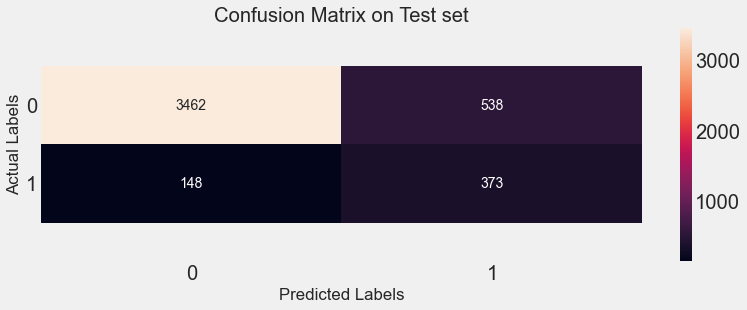

              precision    recall  f1-score   support

           0       0.96      0.87      0.91      4000
           1       0.41      0.72      0.52       521

    accuracy                           0.85      4521
   macro avg       0.68      0.79      0.72      4521
weighted avg       0.90      0.85      0.87      4521



In [80]:
plt.title("Confusion Matrix on Test set")
ax = sns.heatmap(confusion_matrix(y_test, ypred_lr), annot=True, fmt='d')
bottom, top = ax.get_ylim()
ax.set_ylim(bottom + 0.5, top - 0.5)
plt.yticks(rotation=0)
plt.xlabel("Predicted Labels")
plt.ylabel("Actual Labels")
plt.show()
print(classification_report(y_test, ypred_lr))

In [90]:
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
penalty = ['l2']
C = [0.002] 
hyperparameters = dict(penalty=penalty, C=C)
logres = LogisticRegression(random_state=42)
logres_model = GridSearchCV(logres, hyperparameters, cv=5, scoring='recall')
logres_model.fit(X_train, y_train)
ypred_logrestuning = logres_model.predict(X_test)
eval_classification(logres_model, ypred_logrestuning, X_train, y_train, X_test, y_test)

Accuracy (Test Set): 0.84517
Precision (Test Set): 0.40839
Recall (Test Set): 0.76583
F1-Score (Test Set): 0.53271
AUC: 0.81067


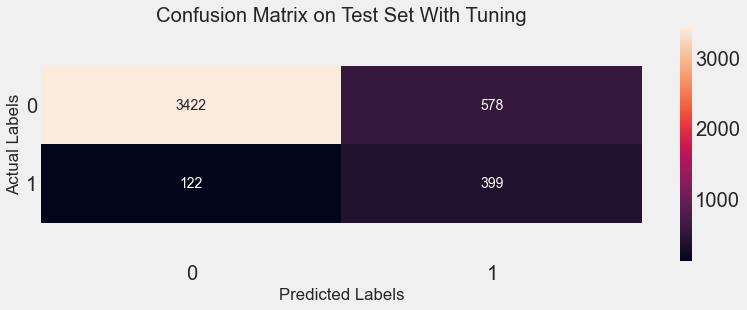

              precision    recall  f1-score   support

           0       0.97      0.86      0.91      4000
           1       0.41      0.77      0.53       521

    accuracy                           0.85      4521
   macro avg       0.69      0.81      0.72      4521
weighted avg       0.90      0.85      0.86      4521



In [107]:
plt.title("Confusion Matrix on Test Set With Tuning")
ax = sns.heatmap(confusion_matrix(y_test, ypred_logrestuning), annot=True, fmt='d')
bottom, top = ax.get_ylim()
ax.set_ylim(bottom + 0.5, top - 0.5)
plt.yticks(rotation=0)
plt.xlabel("Predicted Labels")
plt.ylabel("Actual Labels")
plt.show()
print(classification_report(y_test, ypred_logrestuning))

In [99]:
print('Best algorithm:', logres_model.best_estimator_.get_params()['penalty'])
print('Best C:', logres_model.best_estimator_.get_params()['C'])

Best algorithm: l2
Best C: 0.002


In [91]:
data1= pd.DataFrame({'prediksi':ypred_logrestuning})
data2= pd.DataFrame({'actual':y_test})

In [92]:
data1['total_data'] = data1['prediksi'].sum()
data1['percentage']=data1['prediksi']/data1['total_data']
data1.groupby(['prediksi']).count()[['total_data']].reset_index()

,prediksi,total_data
0,0,3544
1,1,977


In [93]:
data2['total_data'] = data2['actual'].sum()
data2.groupby(['actual']).count()['total_data'].reset_index()

,actual,total_data
0,0,4000
1,1,521


In [94]:
pred_lr = pd.DataFrame({
    'pred':ypred_logrestuning})

withmodel_lr = df_test.join(pred_lr)
withmodel_lr = withmodel_lr[withmodel_lr['pred'] == 1].groupby('y', as_index=False).count().iloc[:, :2]
withmodel_lr.columns = ['y', 'count']
withmodel_lr['total'] = withmodel_lr['count'].sum()
withmodel_lr['percentage'] = withmodel_lr['count']/withmodel_lr['total']
withmodel_lr = withmodel_lr.sort_values('y', ascending=False, ignore_index=True)
print('With Model Logistic Regression: ')
display(withmodel_lr)

With Model Logistic Regression: 


,y,count,total,percentage
0,1,399,977,0.408393
1,0,578,977,0.591607


#### Kneighboor

In [95]:
from sklearn.neighbors import KNeighborsClassifier
knn_model = KNeighborsClassifier()
knn_model.fit(X_train,y_train)

ypred_knn = knn_model.predict(X_test)
eval_classification(knn_model, ypred_knn, X_train, y_train, X_test, y_test)

Accuracy (Test Set): 0.87857
Precision (Test Set): 0.48664
Recall (Test Set): 0.97889
F1-Score (Test Set): 0.65010
AUC: 0.92219


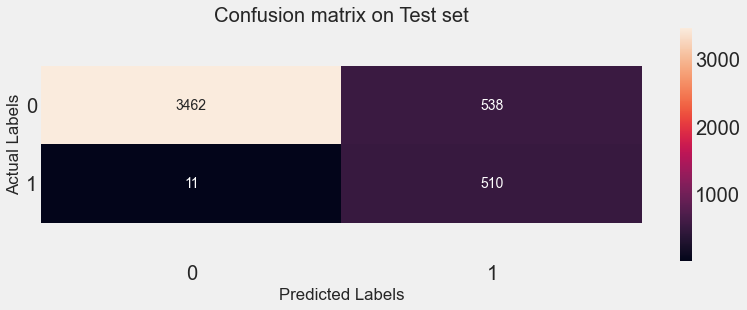

              precision    recall  f1-score   support

           0       1.00      0.87      0.93      4000
           1       0.49      0.98      0.65       521

    accuracy                           0.88      4521
   macro avg       0.74      0.92      0.79      4521
weighted avg       0.94      0.88      0.89      4521



In [96]:
plt.title("Confusion matrix on Test set")
ax1 = sns.heatmap(confusion_matrix(y_test, ypred_knn), annot=True, fmt='d')
bottom, top = ax1.get_ylim()
ax1.set_ylim(bottom + 0.5, top - 0.5)
plt.yticks(rotation=0)
plt.xlabel("Predicted Labels")
plt.ylabel("Actual Labels")
plt.show()
print(classification_report(y_test, ypred_knn))

In [102]:
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import uniform
n_neighbors = [6]
p=[1]
algorithm = ['kd_tree']
hyperparameters = dict(n_neighbors=n_neighbors, p=p, algorithm=algorithm)
kneigh = KNeighborsClassifier()
kneigh_model = RandomizedSearchCV(kneigh, hyperparameters, cv=5, random_state=42, scoring='precision')
kneigh_model.fit(X_train, y_train)
ypred_knntuning = kneigh_model.predict(X_test)
eval_classification(kneigh_model, ypred_knntuning, X_train, y_train, X_test, y_test)

Accuracy (Test Set): 0.90422
Precision (Test Set): 0.54731
Recall (Test Set): 0.97697
F1-Score (Test Set): 0.70159
AUC: 0.93586


In [101]:
print('Best n_neighbors:', kneigh_model.best_estimator_.get_params()['n_neighbors'])
print('Best p:', kneigh_model.best_estimator_.get_params()['p'])
print('Best algorithm:', kneigh_model.best_estimator_.get_params()['algorithm'])

Best n_neighbors: 6
Best p: 1
Best algorithm: kd_tree


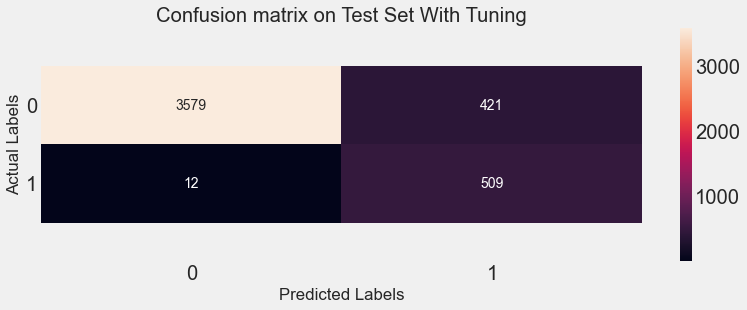

              precision    recall  f1-score   support

           0       1.00      0.89      0.94      4000
           1       0.55      0.98      0.70       521

    accuracy                           0.90      4521
   macro avg       0.77      0.94      0.82      4521
weighted avg       0.94      0.90      0.92      4521



In [108]:
plt.title("Confusion matrix on Test Set With Tuning")
ax1 = sns.heatmap(confusion_matrix(y_test, ypred_knntuning), annot=True, fmt='d')
bottom, top = ax1.get_ylim()
ax1.set_ylim(bottom + 0.5, top - 0.5)
plt.yticks(rotation=0)
plt.xlabel("Predicted Labels")
plt.ylabel("Actual Labels")
plt.show()
print(classification_report(y_test, ypred_knntuning))

In [103]:
data3= pd.DataFrame({'prediksi':ypred_knntuning})
data4= pd.DataFrame({'actual':y_test})

In [104]:
data3['total_data'] = data3['prediksi'].sum()
data3['percentage']=data3['prediksi']/data3['total_data']
data3.groupby(['prediksi']).count()[['total_data']].reset_index()

,prediksi,total_data
0,0,3591
1,1,930


In [105]:
data4['total_data'] = data4['actual'].sum()
data4.groupby(['actual']).count()['total_data'].reset_index()

,actual,total_data
0,0,4000
1,1,521


In [106]:
pred_knn = pd.DataFrame({
    'pred':ypred_knntuning})

withmodel_knn = df_test.join(pred_knn)
withmodel_knn = withmodel_knn[withmodel_knn['pred'] == 1].groupby('y', as_index=False).count().iloc[:, :2]
withmodel_knn.columns = ['y', 'count']
withmodel_knn['total'] = withmodel_knn['count'].sum()
withmodel_knn['percentage'] = withmodel_knn['count']/withmodel_knn['total']
withmodel_knn = withmodel_knn.sort_values('y', ascending=False, ignore_index=True)
print('With Model Kneighboor: ')
display(withmodel_knn)

With Model Kneighboor: 


,y,count,total,percentage
0,1,509,930,0.547312
1,0,421,930,0.452688


#### Decision Tree

In [109]:
from sklearn.tree import DecisionTreeClassifier
dt_model = DecisionTreeClassifier(random_state=42)
dt_model.fit(X_train,y_train)
ypred_dt = dt_model.predict(X_test)
eval_classification(dt_model, ypred_dt, X_train, y_train, X_test, y_test)

Accuracy (Test Set): 0.80027
Precision (Test Set): 0.35530
Recall (Test Set): 0.90019
F1-Score (Test Set): 0.50951
AUC: 0.84372


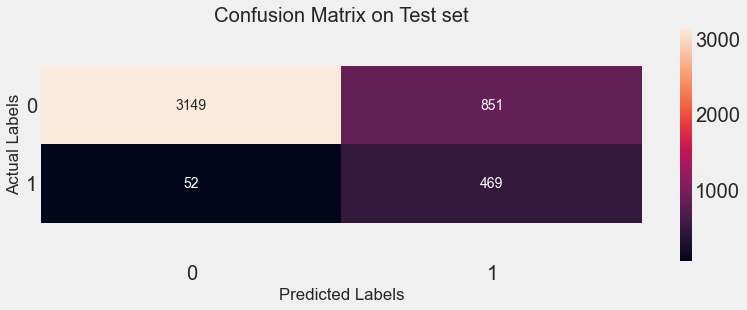

              precision    recall  f1-score   support

           0       0.98      0.79      0.87      4000
           1       0.36      0.90      0.51       521

    accuracy                           0.80      4521
   macro avg       0.67      0.84      0.69      4521
weighted avg       0.91      0.80      0.83      4521



In [110]:
plt.title("Confusion Matrix on Test set")
ax2 = sns.heatmap(confusion_matrix(y_test, ypred_dt), annot=True, fmt='d')
bottom, top = ax2.get_ylim()
ax2.set_ylim(bottom + 0.5, top - 0.5)
plt.yticks(rotation=0)
plt.xlabel("Predicted Labels")
plt.ylabel("Actual Labels")
plt.show()
print(classification_report(y_test, ypred_dt))

In [111]:
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import uniform
import numpy as np
max_depth = [int(x) for x in np.linspace(1, 110, num = 30)]
min_samples_split = [2, 5, 10, 100] 
min_samples_leaf = [1, 2, 4, 10, 20, 50]
max_features = ['auto', 'sqrt']

hyperparameters = dict(max_depth=max_depth, 
                       min_samples_split=min_samples_split, 
                       min_samples_leaf=min_samples_leaf,
                       max_features=max_features
                      )
dttuning = DecisionTreeClassifier(random_state=42)
dttuning_model = RandomizedSearchCV(dttuning, hyperparameters, cv=5, random_state=42, scoring='precision')
dttuning_model.fit(X_train, y_train)

ypred_dttuning = dttuning_model.predict(X_test)
eval_classification(dttuning_model, ypred_dttuning, X_train, y_train, X_test, y_test)

Accuracy (Test Set): 0.73501
Precision (Test Set): 0.28259
Recall (Test Set): 0.84453
F1-Score (Test Set): 0.42348
AUC: 0.78264


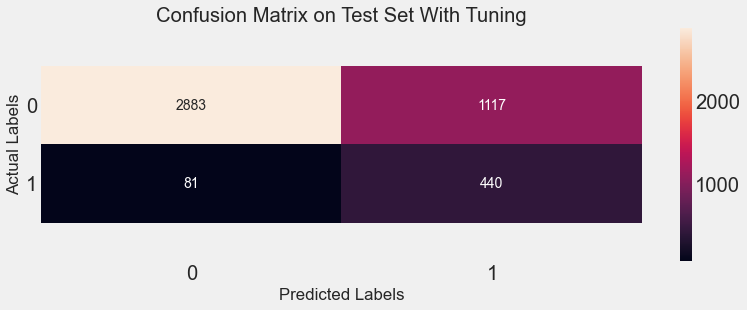

              precision    recall  f1-score   support

           0       0.97      0.72      0.83      4000
           1       0.28      0.84      0.42       521

    accuracy                           0.74      4521
   macro avg       0.63      0.78      0.63      4521
weighted avg       0.89      0.74      0.78      4521



In [112]:
plt.title("Confusion Matrix on Test Set With Tuning")
ax2 = sns.heatmap(confusion_matrix(y_test, ypred_dttuning), annot=True, fmt='d')
bottom, top = ax2.get_ylim()
ax2.set_ylim(bottom + 0.5, top - 0.5)
plt.yticks(rotation=0)
plt.xlabel("Predicted Labels")
plt.ylabel("Actual Labels")
plt.show()
print(classification_report(y_test, ypred_dttuning))

In [113]:
data5= pd.DataFrame({'prediksi':ypred_dttuning})
data6= pd.DataFrame({'actual':y_test})

In [114]:
data5['total_data'] = data5['prediksi'].sum()
data5['percentage']=data5['prediksi']/data5['total_data']
data5.groupby(['prediksi']).count()[['total_data']].reset_index()

,prediksi,total_data
0,0,2964
1,1,1557


In [115]:
data6['total_data'] = data6['actual'].sum()
data6.groupby(['actual']).count()['total_data'].reset_index()

,actual,total_data
0,0,4000
1,1,521


In [116]:
pred_dt = pd.DataFrame({
    'pred':ypred_dttuning})

withmodel_dt = df_test.join(pred_dt)
withmodel_dt = withmodel_dt[withmodel_dt['pred'] == 1].groupby('y', as_index=False).count().iloc[:, :2]
withmodel_dt.columns = ['y', 'count']
withmodel_dt['total'] = withmodel_dt['count'].sum()
withmodel_dt['percentage'] = withmodel_dt['count']/withmodel_dt['total']
withmodel_dt = withmodel_dt.sort_values('y', ascending=False, ignore_index=True)
print('With Model Decission Tree: ')
display(withmodel_dt)

With Model Decission Tree: 


,y,count,total,percentage
0,1,440,1557,0.282595
1,0,1117,1557,0.717405


#### Bagging Random Forest

In [117]:
from sklearn.ensemble import RandomForestClassifier
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train,y_train)

ypred_rf = rf_model.predict(X_test)
eval_classification(rf_model, ypred_rf, X_train, y_train, X_test, y_test)

Accuracy (Test Set): 0.73170
Precision (Test Set): 0.29860
Recall (Test Set): 0.98464
F1-Score (Test Set): 0.45824
AUC: 0.84170


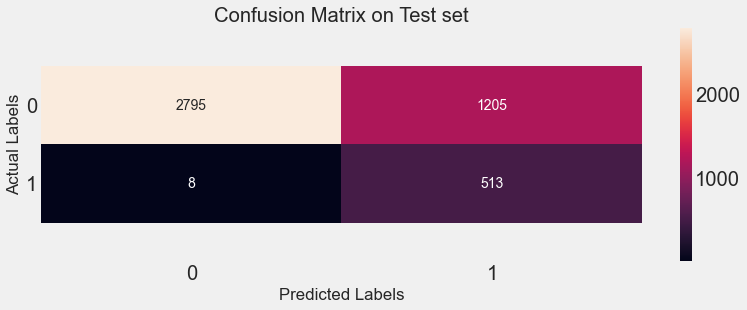

              precision    recall  f1-score   support

           0       1.00      0.70      0.82      4000
           1       0.30      0.98      0.46       521

    accuracy                           0.73      4521
   macro avg       0.65      0.84      0.64      4521
weighted avg       0.92      0.73      0.78      4521



In [118]:
plt.title("Confusion Matrix on Test set")
ax3 = sns.heatmap(confusion_matrix(y_test, ypred_rf), annot=True, fmt='d')
bottom, top = ax3.get_ylim()
ax3.set_ylim(bottom + 0.5, top - 0.5)
plt.yticks(rotation=0)
plt.xlabel("Predicted Labels")
plt.ylabel("Actual Labels")
plt.show()
print(classification_report(y_test, ypred_rf))

In [119]:
data7= pd.DataFrame({'prediksi':ypred_rf})
data8= pd.DataFrame({'actual':y_test})

In [120]:
data7['total_data'] = data7['prediksi'].sum()
data7['percentage']=data7['prediksi']/data7['total_data']
data7.groupby(['prediksi']).count()[['total_data']].reset_index()

,prediksi,total_data
0,0,2803
1,1,1718


In [121]:
data8['total_data'] = data8['actual'].sum()
data8.groupby(['actual']).count()['total_data'].reset_index()

,actual,total_data
0,0,4000
1,1,521


In [122]:
pred_rf = pd.DataFrame({
    'pred':ypred_rf})

withmodel_rf = df_test.join(pred_rf)
withmodel_rf = withmodel_rf[withmodel_rf['pred'] == 1].groupby('y', as_index=False).count().iloc[:, :2]
withmodel_rf.columns = ['y', 'count']
withmodel_rf['total'] = withmodel_rf['count'].sum()
withmodel_rf['percentage'] = withmodel_rf['count']/withmodel_rf['total']
withmodel_rf = withmodel_rf.sort_values('y', ascending=False, ignore_index=True)
print('With Model Bagging Random Forest: ')
display(withmodel_rf)

With Model Bagging Random Forest: 


,y,count,total,percentage
0,1,513,1718,0.298603
1,0,1205,1718,0.701397


#### Boosting AdaBoost

In [123]:
from sklearn.ensemble import AdaBoostClassifier
ab_model = AdaBoostClassifier(random_state=42)
ab_model.fit(X_train,y_train)

ypred_ab = ab_model.predict(X_test)
eval_classification(ab_model, ypred_ab, X_train, y_train, X_test, y_test)

Accuracy (Test Set): 0.75227
Precision (Test Set): 0.28744
Recall (Test Set): 0.77735
F1-Score (Test Set): 0.41969
AUC: 0.76318


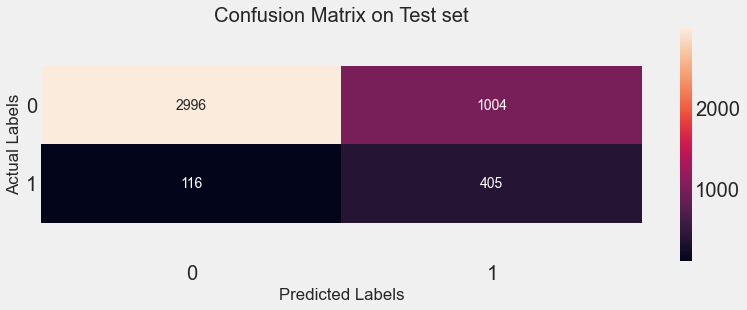

              precision    recall  f1-score   support

           0       0.96      0.75      0.84      4000
           1       0.29      0.78      0.42       521

    accuracy                           0.75      4521
   macro avg       0.63      0.76      0.63      4521
weighted avg       0.88      0.75      0.79      4521



In [124]:
plt.title("Confusion Matrix on Test set")
ax4 = sns.heatmap(confusion_matrix(y_test, ypred_ab), annot=True, fmt='d')
bottom, top = ax4.get_ylim()
ax4.set_ylim(bottom + 0.5, top - 0.5)
plt.yticks(rotation=0)
plt.xlabel("Predicted Labels")
plt.ylabel("Actual Labels")
plt.show()
print(classification_report(y_test, ypred_ab))

In [125]:
data9= pd.DataFrame({'prediksi':ypred_ab})
data10= pd.DataFrame({'actual':y_test})

In [126]:
data9['total_data'] = data9['prediksi'].sum()
data9['percentage']=data9['prediksi']/data9['total_data']
data9.groupby(['prediksi']).count()[['total_data']].reset_index()

,prediksi,total_data
0,0,3112
1,1,1409


In [127]:
data10['total_data'] = data10['actual'].sum()
data10.groupby(['actual']).count()['total_data'].reset_index()

,actual,total_data
0,0,4000
1,1,521


In [128]:
pred_ab = pd.DataFrame({
    'pred':ypred_ab})

withmodel_ab = df_test.join(pred_ab)
withmodel_ab = withmodel_ab[withmodel_ab['pred'] == 1].groupby('y', as_index=False).count().iloc[:, :2]
withmodel_ab.columns = ['y', 'count']
withmodel_ab['total'] = withmodel_ab['count'].sum()
withmodel_ab['percentage'] = withmodel_ab['count']/withmodel_ab['total']
withmodel_ab = withmodel_ab.sort_values('y', ascending=False, ignore_index=True)
print('With Model Boosting AdaBoost: ')
display(withmodel_ab)

With Model Boosting AdaBoost: 


,y,count,total,percentage
0,1,405,1409,0.287438
1,0,1004,1409,0.712562
